# HR-аналитика компании «Работа с заботой»

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

У нас есть несколько задач: 

1. построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

2. построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Описание данных**

* **id** — уникальный идентификатор сотрудника;
* **dept** — отдел, в котором работает сотрудник;
* **level** — уровень занимаемой должности;
* **workload** — уровень загруженности сотрудника;
* **employment_years** — длительность работы в компании (в годах);
* **last_year_promo** — показывает, было ли повышение за последний год;
* **last_year_violations** — показывает, нарушал ли сотрудник трудовой договор за последний год;
* **supervisor_evaluation** — оценка качества работы сотрудника, которую дал руководитель;
* **salary** — ежемесячная зарплата сотрудника;
* **job_satisfaction_rate** — уровень удовлетворённости сотрудника работой в компании, целевой признак в первом задании;
* **quit** — увольнение сотрудника из компании, целевой признак во втором задании.



<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Установим-необходимые-библиотеки" data-toc-modified-id="Установим-необходимые-библиотеки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Установим необходимые библиотеки</a></span></li><li><span><a href="#Импортируем-необходимые-библиотеки" data-toc-modified-id="Импортируем-необходимые-библиотеки-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Импортируем необходимые библиотеки</a></span></li><li><span><a href="#Используемые-в-проекте-функции" data-toc-modified-id="Используемые-в-проекте-функции-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Используемые в проекте функции</a></span></li></ul></li><li><span><a href="#Предсказание-уровня-удовлетворённости-сотрудника" data-toc-modified-id="Предсказание-уровня-удовлетворённости-сотрудника-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предсказание уровня удовлетворённости сотрудника</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Проверим-соответствие-данных-описанию" data-toc-modified-id="Проверим-соответствие-данных-описанию-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Проверим соответствие данных описанию</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на-наличие-пропусков-и-явных-дубликатов" data-toc-modified-id="Проверим-данные-на-наличие-пропусков-и-явных-дубликатов-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Проверим данные на наличие пропусков и явных дубликатов</a></span></li><li><span><a href="#Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их" data-toc-modified-id="Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Проверим данные на наличие неявных дубликатов и обработаем их</a></span></li><li><span><a href="#Пайплайн-для-обработки-пропущенных-значений" data-toc-modified-id="Пайплайн-для-обработки-пропущенных-значений-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Пайплайн для обработки пропущенных значений</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построим-графики-для-наших-датасетов-и-выведем-описательную-статистику-для-числовых-признаков" data-toc-modified-id="Построим-графики-для-наших-датасетов-и-выведем-описательную-статистику-для-числовых-признаков-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Построим графики для наших датасетов и выведем описательную статистику для числовых признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Создадим-пайплайн-для-обработки-категориальных-признаков" data-toc-modified-id="Создадим-пайплайн-для-обработки-категориальных-признаков-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Создадим пайплайн для обработки категориальных признаков</a></span></li><li><span><a href="#Создаём-общий-пайплайн-для-подготовки-данных" data-toc-modified-id="Создаём-общий-пайплайн-для-подготовки-данных-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Создаём общий пайплайн для подготовки данных</a></span></li><li><span><a href="#Cоздаём-итоговый-пайплайн:-подготовка-данных-и-модель" data-toc-modified-id="Cоздаём-итоговый-пайплайн:-подготовка-данных-и-модель-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Cоздаём итоговый пайплайн: подготовка данных и модель</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучим-модели" data-toc-modified-id="Обучим-модели-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Обучим модели</a></span></li><li><span><a href="#Выберем-лучшую-модель-и-параметры-с-помощью-RandomizedSearchCV()" data-toc-modified-id="Выберем-лучшую-модель-и-параметры-с-помощью-RandomizedSearchCV()-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Выберем лучшую модель и параметры с помощью <code>RandomizedSearchCV()</code></a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предсказание-увольнения-сотрудника-из-компании" data-toc-modified-id="Предсказание-увольнения-сотрудника-из-компании-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предсказание увольнения сотрудника из компании</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Проверим-соответствие-данных-описанию" data-toc-modified-id="Проверим-соответствие-данных-описанию-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Проверим соответствие данных описанию</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на-наличие-пропусков-и-явных-дубликатов" data-toc-modified-id="Проверим-данные-на-наличие-пропусков-и-явных-дубликатов-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Проверим данные на наличие пропусков и явных дубликатов</a></span></li><li><span><a href="#Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их" data-toc-modified-id="Проверим-данные-на-наличие-неявных-дубликатов-и-обработаем-их-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Проверим данные на наличие неявных дубликатов и обработаем их</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построим-графики-для-наших-датасетов-и-выведем-описательную-статистику-для-числовых-признаков" data-toc-modified-id="Построим-графики-для-наших-датасетов-и-выведем-описательную-статистику-для-числовых-признаков-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Построим графики для наших датасетов и выведем описательную статистику для числовых признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Составим-портрет-«уволившегося-сотрудника»" data-toc-modified-id="Составим-портрет-«уволившегося-сотрудника»-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Составим портрет «уволившегося сотрудника»</a></span></li><li><span><a href="#Проверим-зависимость-целевых-признаков" data-toc-modified-id="Проверим-зависимость-целевых-признаков-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Проверим зависимость целевых признаков</a></span></li></ul></li><li><span><a href="#Добавление-нового-входного-признака" data-toc-modified-id="Добавление-нового-входного-признака-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Добавление нового входного признака</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Установим необходимые библиотеки

In [1]:
!pip install phik -q 

In [2]:
!pip install --upgrade scikit-learn -q

### Импортируем необходимые библиотеки

In [3]:
# библиотека для работы с данными
import pandas as pd
# библиотека для создания графиков
import matplotlib.pyplot as plt
# функция для создания легенды на графиках
from matplotlib.patches import Patch
# библиотека для визуализации данных
import seaborn as sns
# библиотека для работы с массивами и матрицами
import numpy as np
# модуль scipy из stats
from scipy import stats as st
# функция для вычисления и визуализации матрицы корреляции
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# класс для создания пайплайнов в sklearn
from sklearn.pipeline import Pipeline
# класс для создания кастомных трансформеров
from sklearn.base import BaseEstimator, TransformerMixin

# классы для подготовки данных
from sklearn.preprocessing import (
    # для кодирования категориальных признаков OneHotEncoder    
    OneHotEncoder,
    # для кодирования порядковых признаков
    OrdinalEncoder,
    # для стандартизации признаков
    StandardScaler,
    # для масштабирования признаков в диапазоне от 0 до 1
    MinMaxScaler,
    # для масштабирования признаков, устойчивого к выбросам
    RobustScaler     
)
# класс для объединения преобразований признаков
from sklearn.compose import ColumnTransformer
# функция для разделения данных на обучающий и тестовый наборы
#from sklearn.model_selection import train_test_split

# класс для работы с пропущенными значениями
from sklearn.impute import SimpleImputer

# функции для работы с метриками из sklearn.metrics
# для вычисления ROC AUC
from sklearn.metrics import roc_auc_score
# для создания собственных метрик
from sklearn.metrics import make_scorer      

# класс для случайного поиска по сетке
from sklearn.model_selection import RandomizedSearchCV

# модели из sklearn для построения классификаторов и регрессоров
# логистическая регрессия
from sklearn.linear_model import LogisticRegression
# линейная регрессия
from sklearn.linear_model import LinearRegression
# классификатор k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# классификатор дерева решений
from sklearn.tree import DecisionTreeClassifier
# регрессор дерева решений
from sklearn.tree import DecisionTreeRegressor
# классификатор метода опорных векторов
from sklearn.svm import SVC 
# случайный лес классификатор
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingRegressor
)
# Dummy регрессор и классификатор
from sklearn.dummy import (
    DummyRegressor, 
    DummyClassifier
)
# импортируем библиотеку для визуализации SHAP значений
import shap

# задаём значение констант
# для воспроизводимости результатов
RANDOM_STATE = 42

# задаём стиль для графиков
sns.set_style("darkgrid")

# Импорт os для работы с операционной системой
import os

# игнорируем предупреждения
import warnings
warnings.simplefilter("ignore")

### Используемые в проекте функции

In [4]:
def info_func(df):
    '''
    функция для просмотра характеристик датафреймов 
    функция info_func принимает на вход DataFrame df и выводит первые несколько строк этого DataFrame,
    а также общую информацию о нем.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется вывести информацию.

    Returns:
    None: Функция не возвращает значений, она лишь выводит информацию о DataFrame.
    '''
    print('-'*22,'Исходный датафрейм', df.name, '-'*22)
    display(df.head())
    print('')
    print('')
    print('-'*12,'Общая информация о датафрейме', df.name,'-'*12)
    print('')
    print('')
    df.info()

In [5]:
def check_func(df):
    '''
    функция для проверки наличия пропусков и дубликатов в данных
    функция check_func принимает на вход DataFrame df и выводит количество пустых значений
    и количество явных дубликатов в этом DataFrame.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется проверить
    наличие пустых значений и дубликатов.

    Returns:
    None: Функция не возвращает значений, она лишь выводит количество пустых значений
    и дубликатов в DataFrame.
    '''
    print('-'*10,'Количество пустых значений в датафрейме',df.name,'-'*10)
    print('')
    print('')
    display(df.isna().sum())
    print('-'*10,'Количество явных дубликатов в датафрейме',df.name,'-'*10)
    display(df.duplicated().sum())

In [6]:
def df_unique(df):
    '''
    функция для проверки наличия пропусков и дубликатов в данных
    функция df_unique принимает на вход DataFrame df и выводит список уникальных значений
    для каждого столбца типа 'object'.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется вывести список уникальных значений
                   для столбцов типа 'object'.

    Returns:
    None: Функция не возвращает значений, она лишь выводит список уникальных значений
    в столбцах типа 'object'.
    '''
    # выбираем столбцы типа 'object'
    object_columns = df.select_dtypes(include=['object'])

    # выводим список уникальных значений для этих столбцов
    for column in object_columns.columns:
        print(f'Список уникальных значений в столбце: {column}:')
        print(object_columns[column].unique())
        print()

In [7]:
def visualize_data(df_, dis__columns=None, target=None):
    '''
    Функция строит гистограммы для числовых столбцов,
    график подсчета для дискретных и 
    countplot для категориальных столбцов, выводит описательную статистику.
    Принимает на вход DataFrame df.

    Parameters:
    - df (DataFrame): Исходный DataFrame, для которого требуется построить графики.
    - target (str): Имя целевого столбца. По умолчанию None.
    - dis_columns (list): Список дискретных (категориальных) столбцов. По умолчанию None.

    Returns:
    None: Функция не возвращает значений, она лишь строит графики для указанных столбцов.
    '''
    # Проверка наличия данных
    if df_.empty:
        print("Ошибка: DataFrame пуст.")
        return
    
    name = getattr(df_, "name", "df")
    
    # Обработка NaN значений
    df = df_.dropna()
    
    unique_targets = None
    # Получение числовых столбцов
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Исключение столбца 'id', если он есть
    if 'id' in num_cols:
        num_cols.remove('id')
    del_l = []
    del_ = []

    # Удаление dis_column, если её нет в num_cols
    if dis__columns:
        for col in dis_columns:
            if col not in num_cols:
                del_l.append(col)
    if del_l:
        for col in del_l:
            dis_columns.remove(col)
            
    # Удаление num_col, если она есть в dis_columns
    if num_cols:
        for col in num_cols:
            if col in dis_columns:
                del_.append(col)
    if del_:
        for col in del_:
            num_cols.remove(col)
    
    # Получение категориальных столбцов
    cat_cols = df.select_dtypes(include='object').columns
    
    # Подсчет количества числовых и категориальных столбцов
    num_col_count = len(num_cols)
    cat_col_count = len(cat_cols)
    total_plots = num_col_count + cat_col_count
    
    # Вычисление количества строк и столбцов для subplot
    num_rows = total_plots // 2
    num_cols_subplot = 2
    if total_plots % 2 != 0:
        num_rows += 1
    
    # Создание subplot
    fig, axs = plt.subplots(num_rows, num_cols_subplot, figsize=(12, num_rows * 6))
    axs = axs.flatten()
    
    plot_idx = 0

    # Построение гистограмм для числовых столбцов
    for col in num_cols:
        ax = axs[plot_idx]

        if target and target in df.columns:
            # Определение цветов для уникальных значений целевого столбца
            unique_targets = df[target].unique()
            color_palette = sns.color_palette('husl', len(unique_targets))
            color_dict = {target_value: color for target_value, color in zip(unique_targets, color_palette)}

            sns.kdeplot(data=df, x=col, hue=target, ax=ax, legend=True, palette=color_palette, common_norm=False)
            ax.axvline(x=df[col].mean(), color='r', linestyle='--', label=f'Среднее ({df[col].mean():.2f})')
            ax.axvline(x=df[col].median(), color='g', linestyle='--', label=f'Медиана ({df[col].median():.2f})')
            handles, labels = ax.get_legend_handles_labels()

            # Добавление меток для значений целевого столбца в легенду
            handles.extend([Patch(color=color_dict[label], label=label) for label in unique_targets])
            labels.extend(unique_targets)

            ax.legend(handles=handles, labels=labels)
        else:
            sns.kdeplot(data=df, x=col, ax=ax)
            ax.axvline(x=df[col].mean(), color='r', linestyle='--', label=f'Среднее ({df[col].mean():.2f})')
            ax.axvline(x=df[col].median(), color='g', linestyle='--', label=f'Медиана ({df[col].median():.2f})')
            ax.legend()

        ax.set_ylabel("Плотность распределения")
        ax.set_title(f'Распределение {col}')
        plot_idx += 1

    # Построение countplot для дискретных столбцов
    if dis_columns:
        for col in dis_columns:
            if plot_idx < len(axs):
                ax = axs[plot_idx]
                sns.countplot(data=df, x=col, ax=ax, palette='Blues_d')
                ax.set_title(f'График подсчёта {col}')
                plot_idx += 1

    # Построение Pie диаграмм для категориальных столбцов
    for col in cat_cols:
        if plot_idx < len(axs):
            ax = axs[plot_idx]
            df[col].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', ylabel='', colors=sns.color_palette('Blues_d'))
            ax.set_title(f'Pie диаграмма {col}')
            plot_idx += 1
            
    # Проверяем, остались ли лишние subplot
    if plot_idx < len(axs):
        for i in range(plot_idx, len(axs)):
            fig.delaxes(axs[i])
    
    # Добавление дополнительной информации
    plt.suptitle(f'Графики для {name}', fontsize=14)
    
    # Управление макетом
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Отображение графиков
    plt.show()
    
    # Вывод описательной статистики
    cols = num_cols+dis_columns
    if cols:
        print('Описательная статистика для непрерывных признаков:', name)
        display(df[cols].describe().T)

In [8]:
def plot_scatter(df, target, n_columns, q_columns):
    """
    Визуализирует диаграммы рассеяния для заданного DataFrame.

    Parameters:
    - df: DataFrame, для которого требуется построить диаграммы рассеяния.
    - target: str. Имя целевого столбца, который будет отображаться по оси x на диаграммах рассеяния.
    - n_columns: list of str. Список числовых столбцов, которые будут отображаться по оси y на диаграммах рассеяния.
    - q_columns: list of str. Список категориальных столбцов, по которым данные будут разделены для отображения в разных цветах.

    Returns:
    None: Функция не возвращает значений, она лишь строит диаграммы рассеяния с использованием библиотеки seaborn.
    """
    # Перебираем столбцы
    for q_column in q_columns:
        # Рассчитываем количество строк и столбцов для сетки подграфика.
        num_rows = (len(n_columns) + 1) // 2
        num_cols = 2

        # Создаём график
        fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
        fig.suptitle(f'Диаграммы рассеяния с разделением на подгруппы по {q_column}')
        axes = axes.flatten()

        # Перебираем числовые столбцы
        for i, n_column in enumerate(n_columns):
            # Создаём диаграмму рассеяния для target с числовым столбцом,
            # окрашенным в цвет категориального столбца.
            ax = axes[i]
            sns.scatterplot(
                data=df,
                x=target,
                y=n_column,
                hue=q_column,
                palette='tab10',
                ax=ax)
            ax.set_title(f'{target} - {n_column}')
            ax.set_xlabel(target)
            ax.set_ylabel(n_column)
            ax.grid(True)

        # Удаляем пустые подграфики
        for i in range(len(n_columns), len(axes)):
            fig.delaxes(axes[i])

        # Отображаем график
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

In [9]:
def smape(y_true, y_pred):
    """
    Рассчитывает метрику Symmetric Mean Absolute Percentage Error (SMAPE).

    Параметры:
    - y_true: массив NumPy или объект Series pandas. Реальные значения.
    - y_pred: массив NumPy или объект Series pandas. Предсказанные значения.

    Возвращает:
    Значение метрики SMAPE.

    Формула для SMAPE:
    SMAPE = 100/len(y_true) * Σ(2 * |y_pred - y_true| / (|y_pred| + |y_true|))
    """
    # Преобразование входных данных в массивы numpy, если они не являются таковыми
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    
    absolute_diff = np.abs(y_pred - y_true)
    sum_absolute = np.abs(y_pred) + np.abs(y_true)
    return 100/len(y_true) * np.sum(2 * absolute_diff / sum_absolute)

## Предсказание уровня удовлетворённости сотрудника

### Загрузка данных

#### Загрузим данные

Считаем CSV-файлы в датафреймы

In [10]:
local_path = './datasets/'
online_path = 'https://code.s3.net/datasets/'

files = [
    'train_job_satisfaction_rate.csv',
    'test_features.csv',
    'test_target_job_satisfaction_rate.csv'
]

dfs = []

# Чтение файлов и создание датафреймов
for file_name in files:
    local_file_path = local_path + file_name
    online_file_path = online_path + file_name
    try:
        if os.path.exists(local_file_path):
            df = pd.read_csv(local_file_path)
            print(f"Данные загружены из локальной директории: {file_name}")
        else:
            df = pd.read_csv(online_file_path)
            print(f"Данные загружены из сети: {file_name}")

        # Получение имени датафрейма из имени файла
        df_name = file_name.split('.')[0]
        # Присвоение датафрейму имени    
        globals()[df_name] = df  
        df.name = df_name
        # Добавление датафрейма в список dfs   
        dfs.append(df)           
    except Exception as e:
        print(f"Произошла ошибка при чтении файла {file_name}: {e}")


Данные загружены из локальной директории: train_job_satisfaction_rate.csv
Данные загружены из локальной директории: test_features.csv
Данные загружены из локальной директории: test_target_job_satisfaction_rate.csv


In [11]:
# задаём целевой признак
target = 'job_satisfaction_rate'

#### Проверим соответствие данных описанию

Применим к датафреймам функцию `info_func`

In [12]:
for df in dfs:
    info_func(df)

---------------------- Исходный датафрейм train_job_satisfaction_rate ----------------------


id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20



------------ Общая информация о датафрейме train_job_satisfaction_rate ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
---------------------- Исходный датафрейм test_features ----------------------


id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800



------------ Общая информация о датафрейме test_features ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
---------------------- Исходный датафрейм test_target_job_satisfaction_rate ----------------------


id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08



------------ Общая информация о датафрейме test_target_job_satisfaction_rate ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


#### Вывод

* Датафрейм `train_job_satisfaction_rate` содержит 4000 строк
* Датафреймы `test_features` и `train_job_satisfaction_rate` содержат  по 2000 строк

Данные во всех датафреймах соответствуют описанию.

### Предобработка данных

#### Проверим данные на наличие пропусков и явных дубликатов

Применим функцию `check_func` к нашим датафреймам

In [13]:
for df in dfs:
    check_func(df)

---------- Количество пустых значений в датафрейме train_job_satisfaction_rate ----------




id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

---------- Количество явных дубликатов в датафрейме train_job_satisfaction_rate ----------


0

---------- Количество пустых значений в датафрейме test_features ----------




id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

---------- Количество явных дубликатов в датафрейме test_features ----------


0

---------- Количество пустых значений в датафрейме test_target_job_satisfaction_rate ----------




id                       0
job_satisfaction_rate    0
dtype: int64

---------- Количество явных дубликатов в датафрейме test_target_job_satisfaction_rate ----------


0

В датафреймах `train_job_satisfaction_rate` `test_features`, присутствуют пропущенные значения в `dept` и `level`. Явные дубликаты отсутствуют

#### Проверим данные на наличие неявных дубликатов и обработаем их

Применим функцию `df_unique` к нашим датафреймам

In [14]:
for df in dfs:
    print(f'Датафрейм: {df.name}')
    print()
    df_unique(df)

Датафрейм: train_job_satisfaction_rate

Список уникальных значений в столбце: dept:
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

Список уникальных значений в столбце: level:
['junior' 'middle' 'sinior' nan]

Список уникальных значений в столбце: workload:
['medium' 'high' 'low']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Датафрейм: test_features

Список уникальных значений в столбце: dept:
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

Список уникальных значений в столбце: level:
['junior' 'middle' 'sinior' nan]

Список уникальных значений в столбце: workload:
['medium' 'low' 'high' ' ']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Датафрейм: test_target_job_satisfaction_rate



Заменим `sinior` на `senior` в столбце `level` датафрейма `train_job_satisfaction_rate`

In [15]:
train_job_satisfaction_rate['level'] = train_job_satisfaction_rate['level']\
.replace('sinior', 'senior')

Заменим `sinior` на `senior` в столбце `level` датафрейма `test_features`

In [16]:
test_features['level'] = test_features['level']\
.replace('sinior', 'senior')

In [17]:
for df in dfs:
    print(f'Датафрейм: {df.name}')
    print()
    df_unique(df)

Датафрейм: train_job_satisfaction_rate

Список уникальных значений в столбце: dept:
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

Список уникальных значений в столбце: level:
['junior' 'middle' 'senior' nan]

Список уникальных значений в столбце: workload:
['medium' 'high' 'low']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Датафрейм: test_features

Список уникальных значений в столбце: dept:
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

Список уникальных значений в столбце: level:
['junior' 'middle' 'senior' nan]

Список уникальных значений в столбце: workload:
['medium' 'low' 'high' ' ']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Датафрейм: test_target_job_satisfaction_rate



#### Пайплайн для обработки пропущенных значений 

Напишем пайплайн для заполнения пропущенных значений модой

In [18]:
# Кастомный трансформер для замены пустых строк на NaN
class ReplaceEmptyWithNaNTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.replace(" ", np.nan)
    
    def get_feature_names_out(self, input_features=None):
        return input_features

# Предобработка данных
preprocessing_pipeline = Pipeline([
    # Замена пустых строк на NaN
    ('replace_empty_with_nan', ReplaceEmptyWithNaNTransformer()),
    # Замена NaN на моду
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

#### Вывод

* в датафреймах `train_job_satisfaction_rate` и `test_features` заменили `sinior` на `senior`, можно рекомендовать клиенту исправить ошибку в базе данных, но если эта ошибка будет продолжать присутствовать и в новых данных клиента, то можно оставить как есть
* создали пайплайн для замены `' '` на `NaN` и последующей замены `NaN` на моду

### Исследовательский анализ данных

#### Построим графики для наших датасетов и выведем описательную статистику для числовых признаков

Применим функцию `visualize_data` к нашим датафреймам для построения гистограмм для числовых признаков и круговых диаграмм для категориальных признаков и для вывода описательной статистики числовых признаков

Зададим список с дискретными признаками

In [19]:
# Зададим диссскретные признаки
dis_columns = ['employment_years', 'supervisor_evaluation']

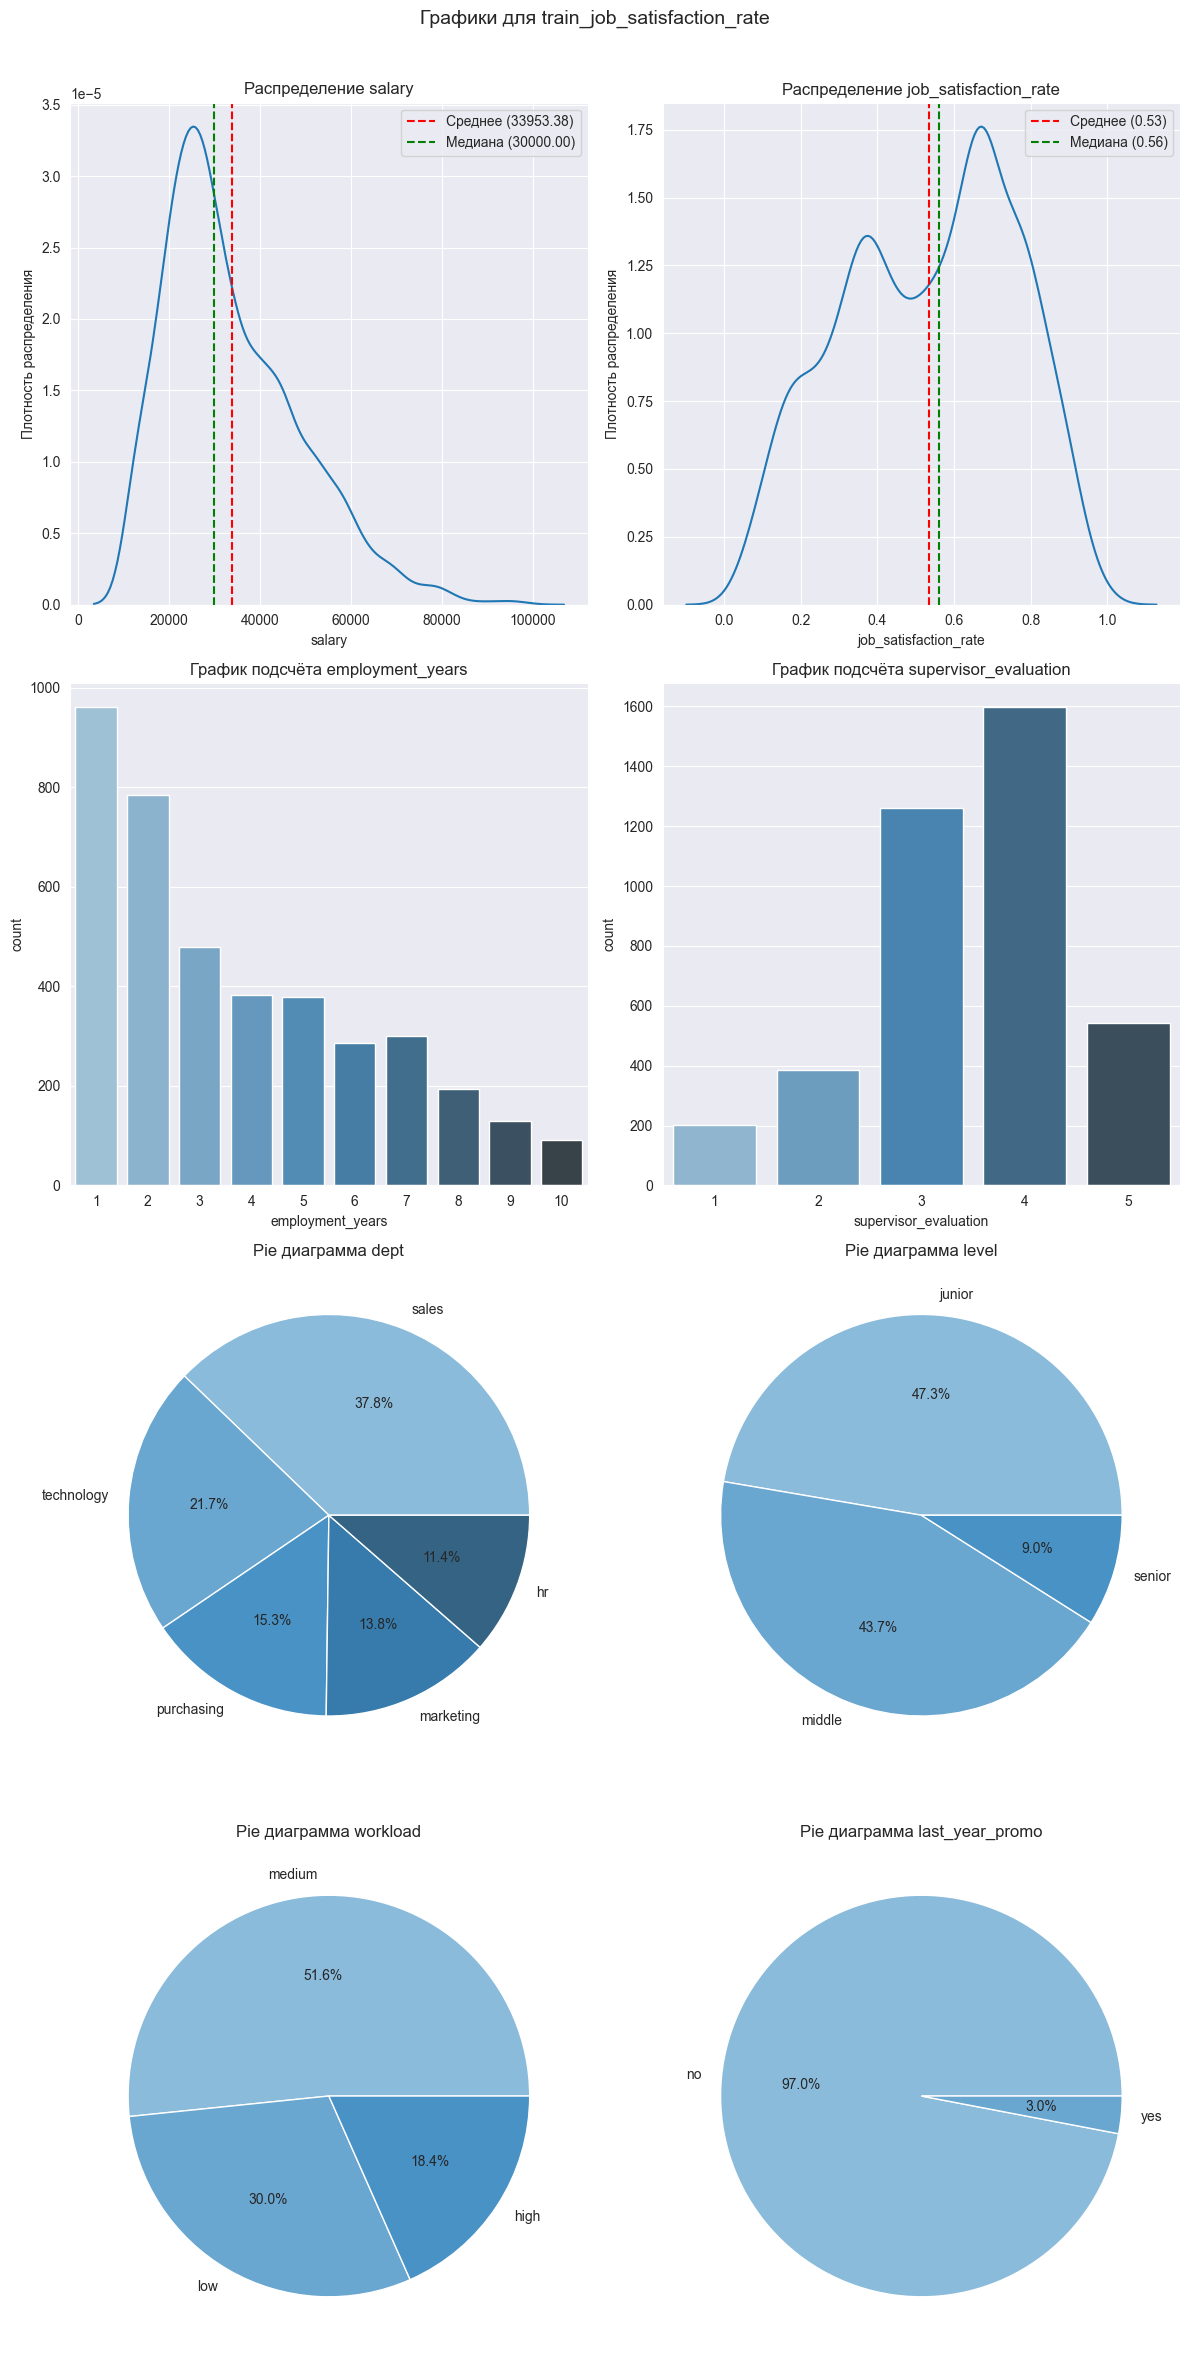

Описательная статистика для непрерывных признаков: train_job_satisfaction_rate


count          mean           std       min       25%  \
salary                 3990.0  33953.383459  14907.247698  12000.00  22800.00   
job_satisfaction_rate  3990.0      0.533772      0.225353      0.03      0.36   
employment_years       3990.0      3.722055      2.543715      1.00      2.00   
supervisor_evaluation  3990.0      3.475188      1.009238      1.00      3.00   

                            50%       75%      max  
salary                 30000.00  43200.00  98400.0  
job_satisfaction_rate      0.56      0.71      1.0  
employment_years           3.00      6.00     10.0  
supervisor_evaluation      4.00      4.00      5.0

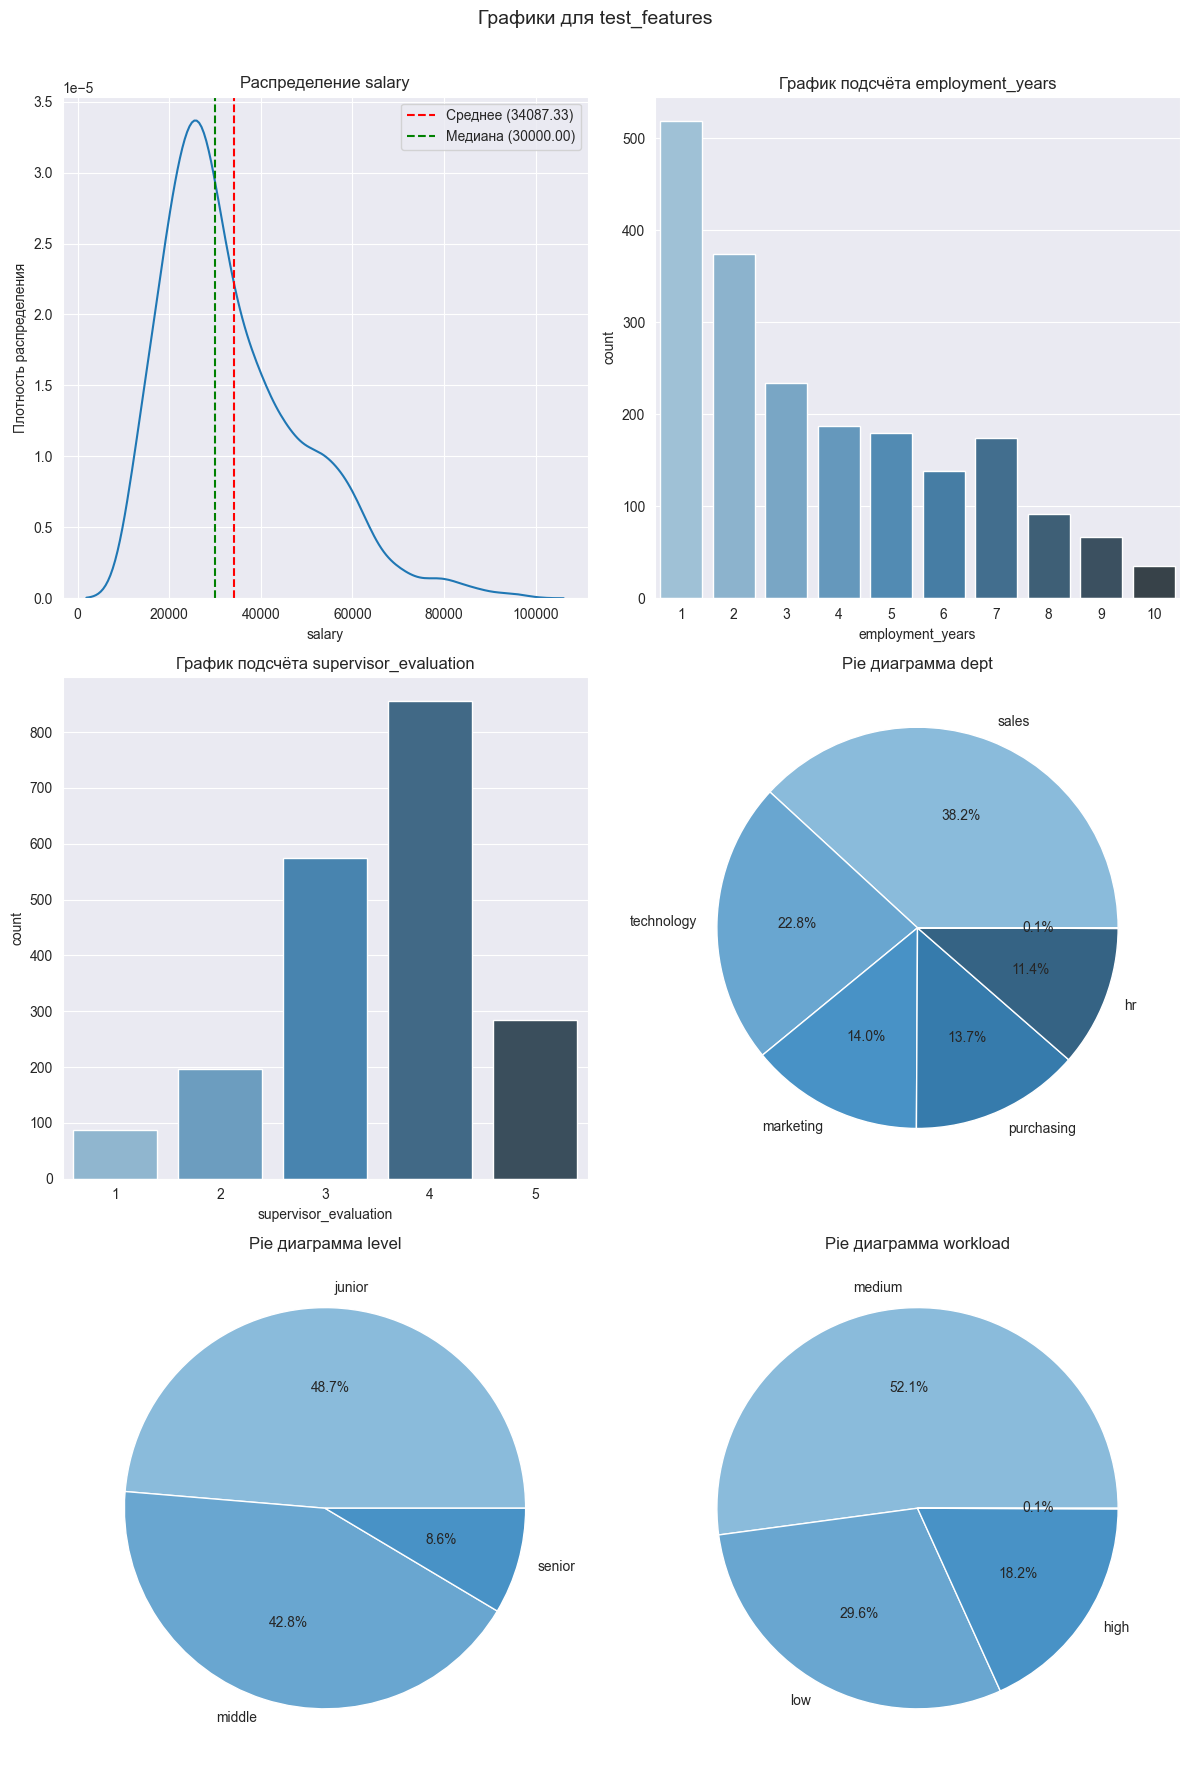

Описательная статистика для непрерывных признаков: test_features


count          mean          std      min      25%  \
salary                 1997.0  34087.330996  15398.58362  12000.0  22800.0   
employment_years       1997.0      3.670506      2.53702      1.0      1.0   
supervisor_evaluation  1997.0      3.527792      0.99591      1.0      3.0   

                           50%      75%      max  
salary                 30000.0  43200.0  96000.0  
employment_years           3.0      6.0     10.0  
supervisor_evaluation      4.0      4.0      5.0

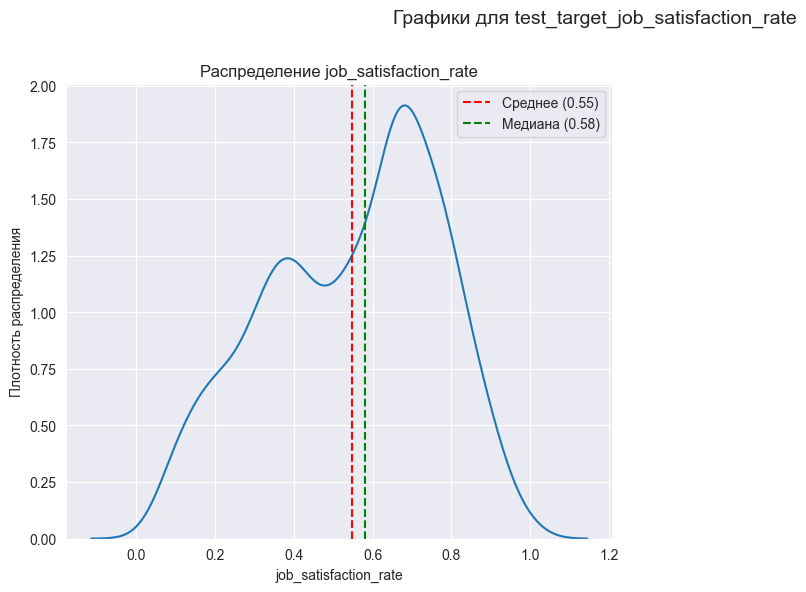

Описательная статистика для непрерывных признаков: test_target_job_satisfaction_rate


count     mean      std   min   25%   50%   75%  max
job_satisfaction_rate  2000.0  0.54878  0.22011  0.03  0.38  0.58  0.72  1.0

In [20]:
for df in dfs:
    visualize_data(df, dis_columns)

`employment_years`, `supervisor_evaluation` и `salary` похожи на распределения Пуассона, `job_satisfaction_rate` похоже на нормальное распределение с несколькими выбивающимися модами. 

`supervisor_evaluation` - ранговый признак

#### Корреляционный анализ

In [21]:
train_job_satisfaction_rate.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

Не все наши признаки имеют нормальное распределение и часть признаков является категориальными, используем библиотеку phik для рассчёта корреляции между признаками разных типов данных

In [22]:
# создаём список с наименованиями непрерывных признаков
con_columns = ['salary', 'job_satisfaction_rate']

In [23]:
# переводим id  в индекс
train_job_satisfaction_rate = train_job_satisfaction_rate.set_index('id')

Проверим наличие дубликатов

In [24]:
train_job_satisfaction_rate.duplicated().sum()

245

Удалим дубликаты

In [25]:
train_job_satisfaction_rate = train_job_satisfaction_rate.drop_duplicates()

Повторим проверку на наличие дубликатов

In [26]:
train_job_satisfaction_rate.duplicated().sum()

0

In [27]:
# считаем корреляции на датафрейме train_job_satisfaction_rate
phik_overview = phik_matrix(train_job_satisfaction_rate, interval_cols=con_columns) 

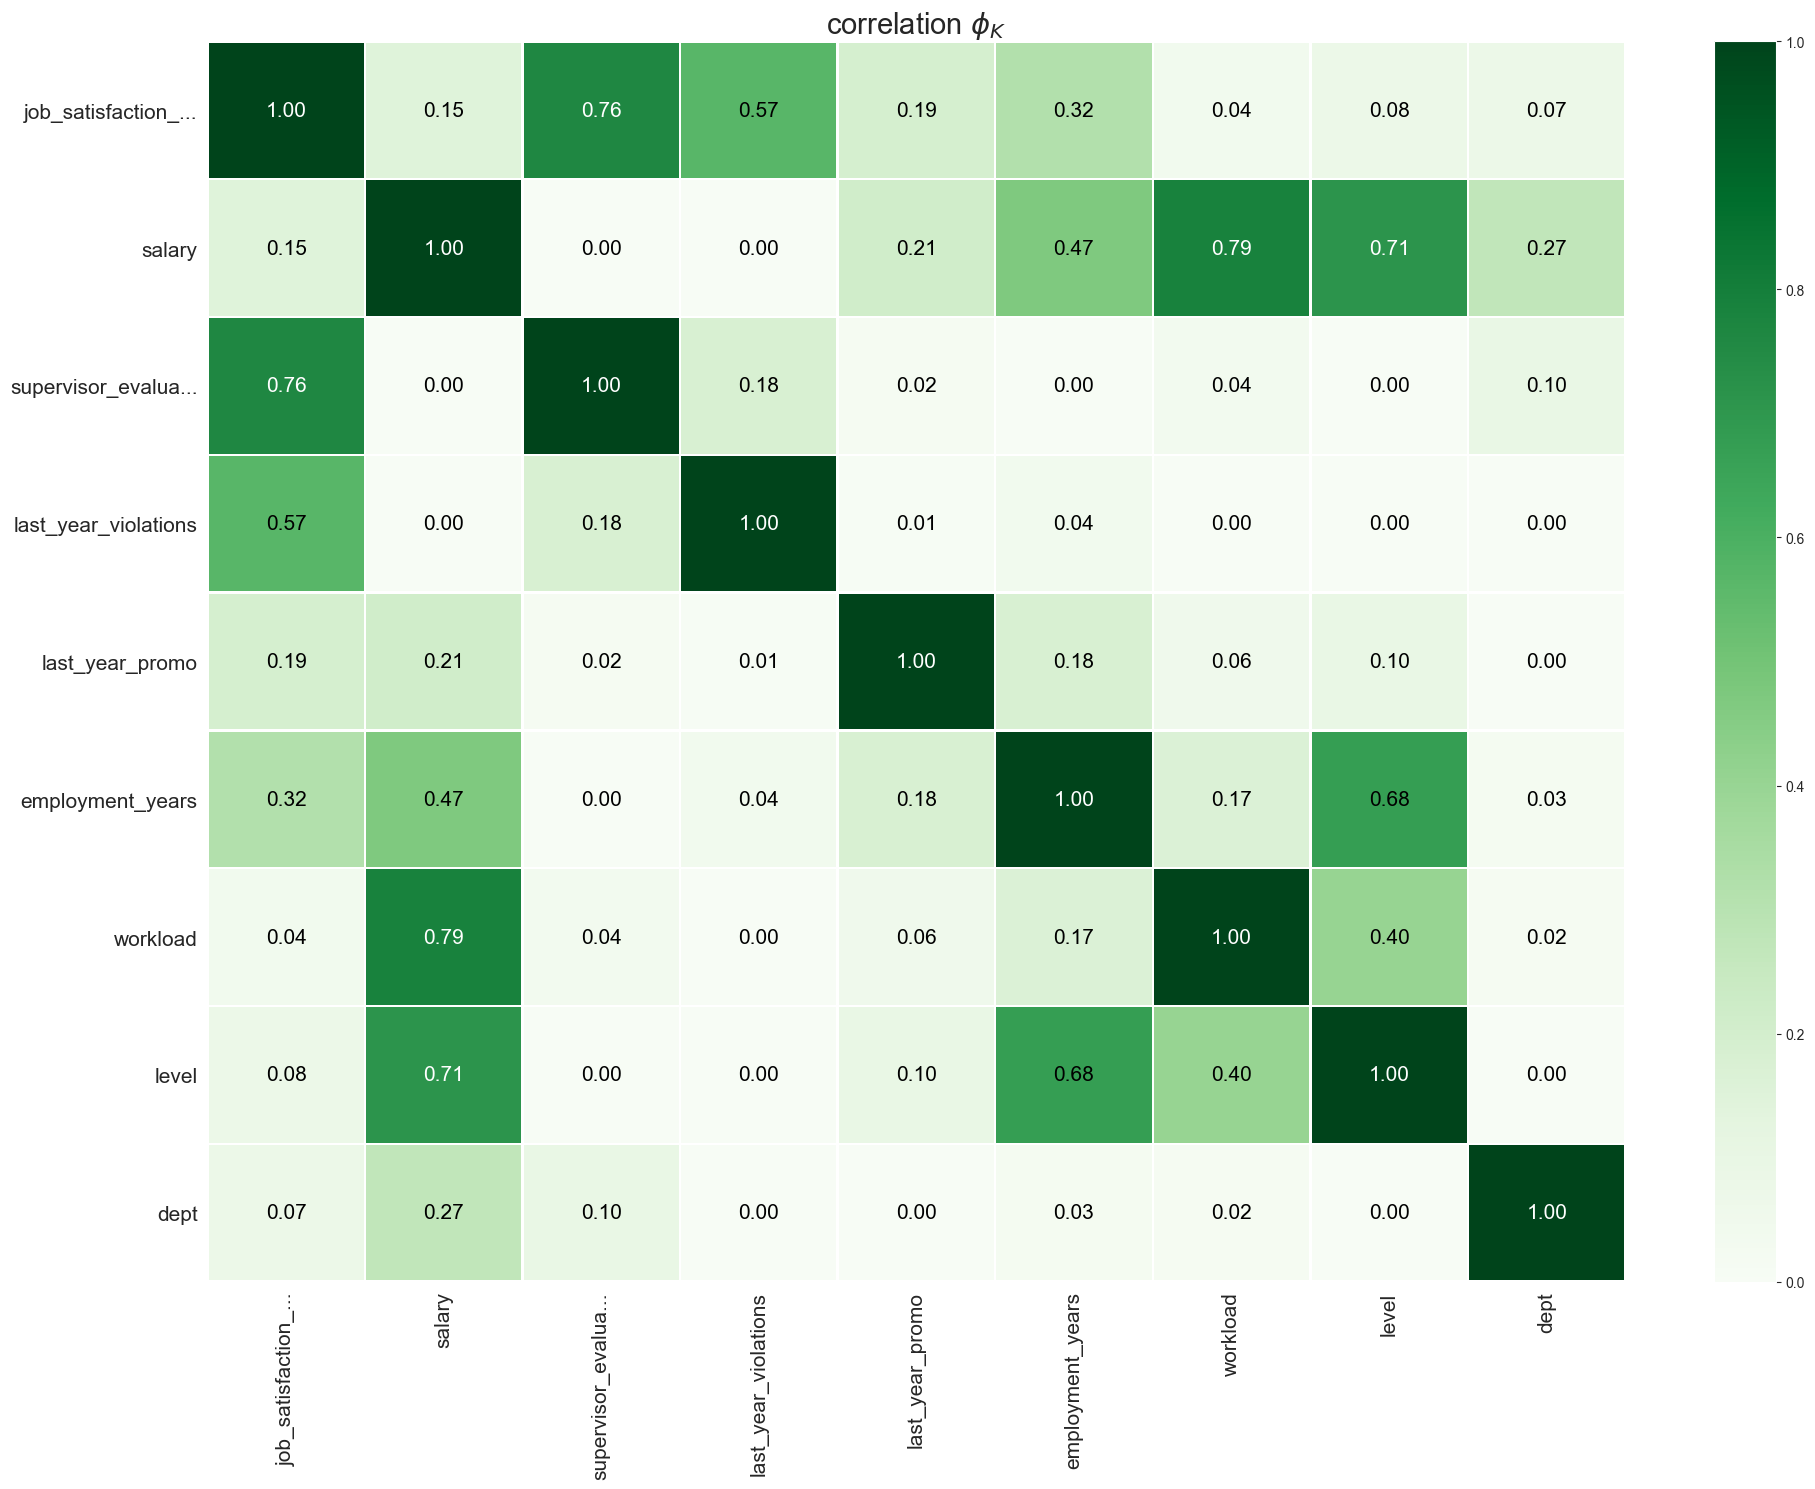

In [28]:
# отображаем матрицу корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [29]:
print('Список признаков в матрице корреляции:\n')
for col in train_job_satisfaction_rate:
    print(col)

Список признаков в матрице корреляции:

dept
level
workload
employment_years
last_year_promo
last_year_violations
supervisor_evaluation
salary
job_satisfaction_rate


In [30]:
train_job_satisfaction_rate.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
155278                   no                      1   24000   
653870                   no                      5   38400   
184592                   no                      2   12000   
171431                   no                      2   18000   
693419                   no                      3   22800   

        job_satisfaction_rate  
id                             
155278                   0.58  
653870                   0.76  
184592                   0.11  
171431                   0.37  
693419                   0.20

Создадим списки с названиями признаков для кодирования/масштабирования/стандартизации

| Признак                |      Тип                   |     Метод     |
|:------------------------|:--------------------------|:---------------------|
| dept                   |       категориальный       |    OneHotEncoder     |
| level                  |  категориальный-ранговый   |    OrdinalEncoder    |
| workload               |  категориальный-ранговый   |    OrdinalEncoder    |
| employment_years       |         числовой           | StandardScaler, MinMaxScaler, RobustScaler, passthrough |
| last_year_promo        |  категориальный-бинарный   |    OneHotEncoder     |
| last_year_violations   |  категориальный-бинарный   |    OneHotEncoder     |
| supervisor_evaluation  |  категориальный-ранговый   |    OrdinalEncoder    |
| salary                 |         числовой           |StandardScaler, MinMaxScaler, RobustScaler, passthrough |


In [31]:
ohe_columns = ['dept',
               'last_year_promo', 
               'last_year_violations',
               'supervisor_evaluation']

ord_columns = ['level',
               'workload']

In [32]:
num_columns = ['employment_years',
               'salary']

In [33]:
q_columns = ohe_columns + ord_columns

Посмотрим зависимости целевого признака от остальных для датафрейма `train_job_satisfaction_rate`

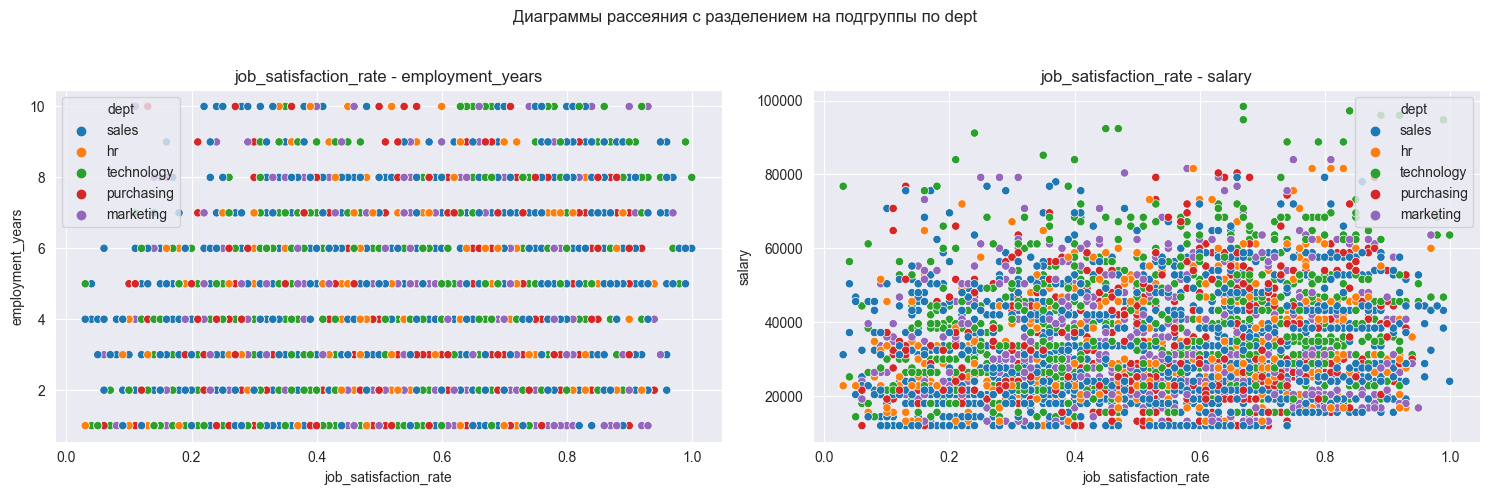

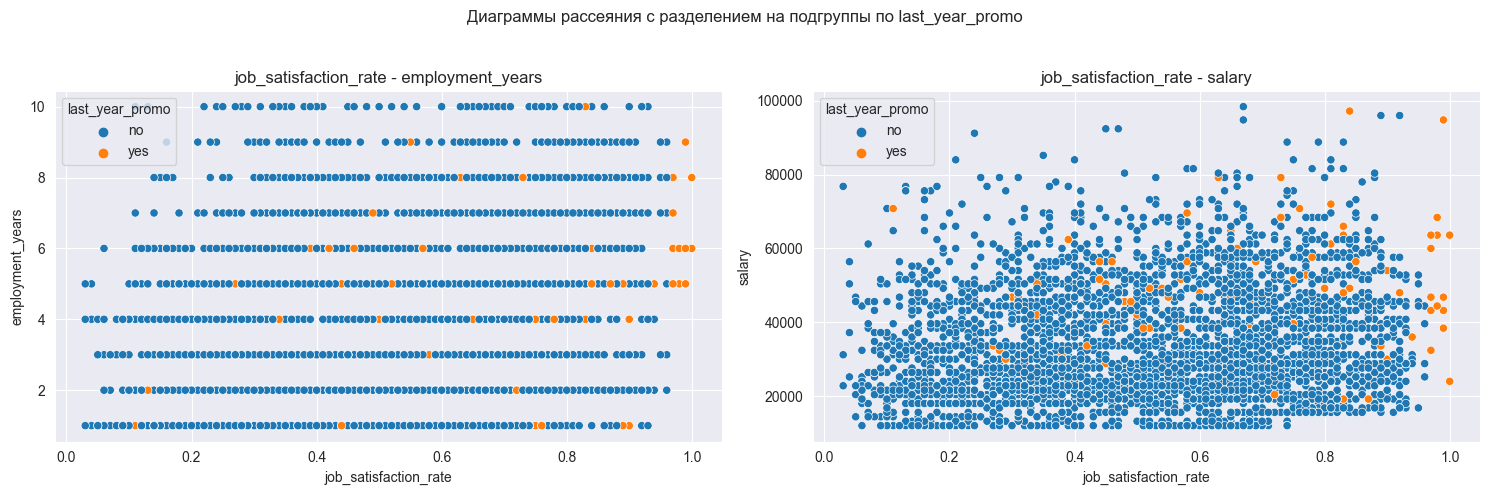

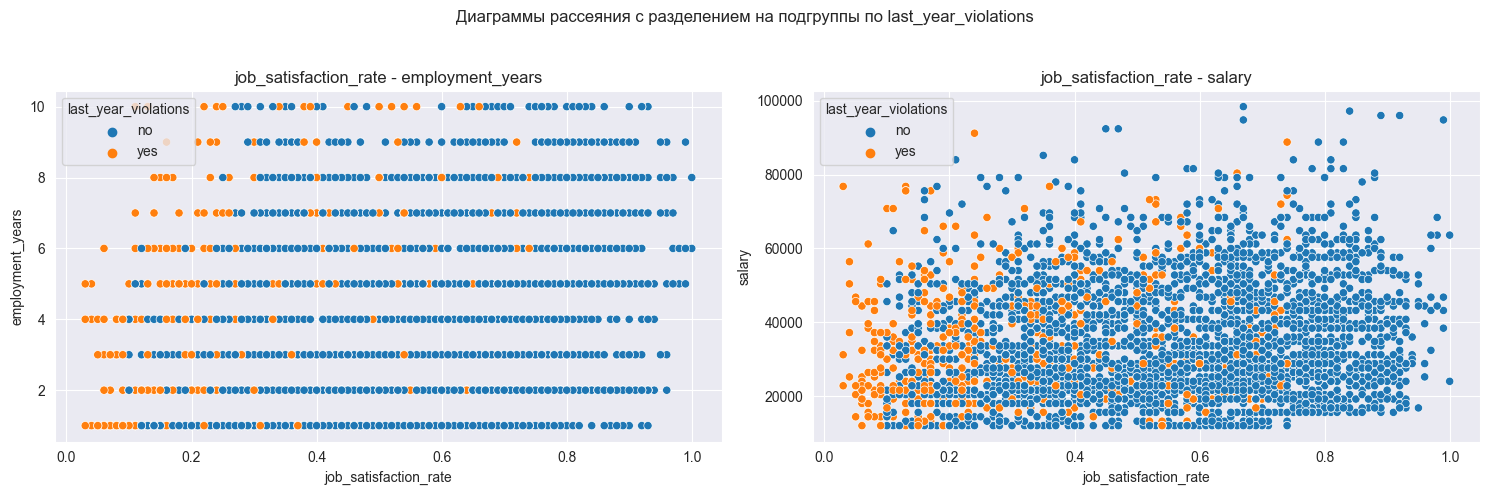

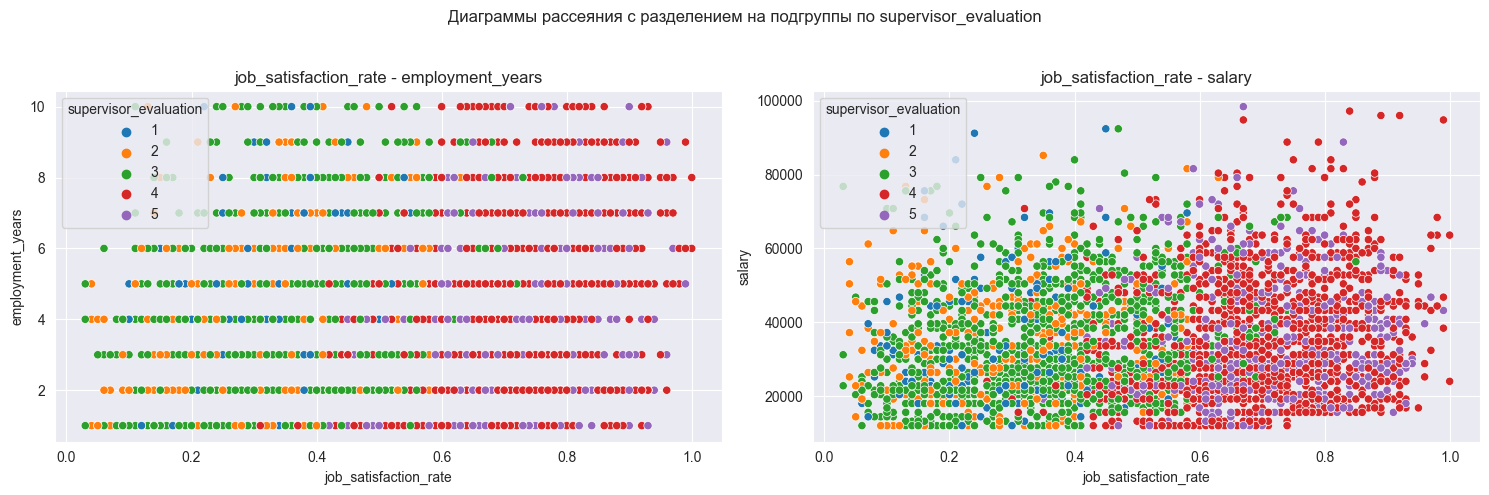

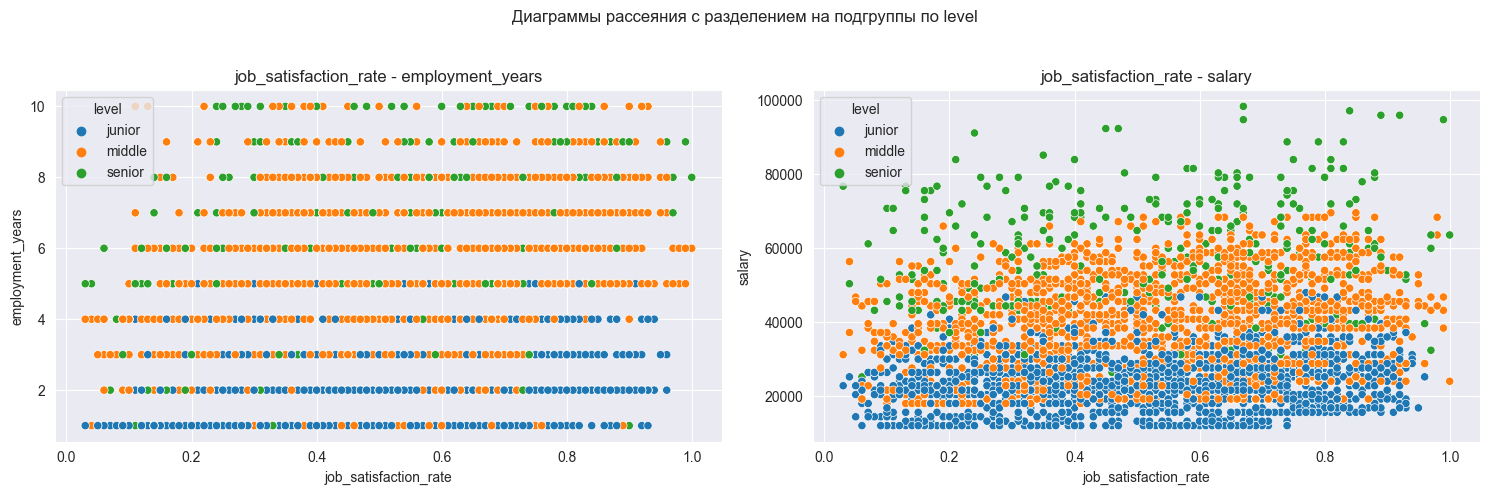

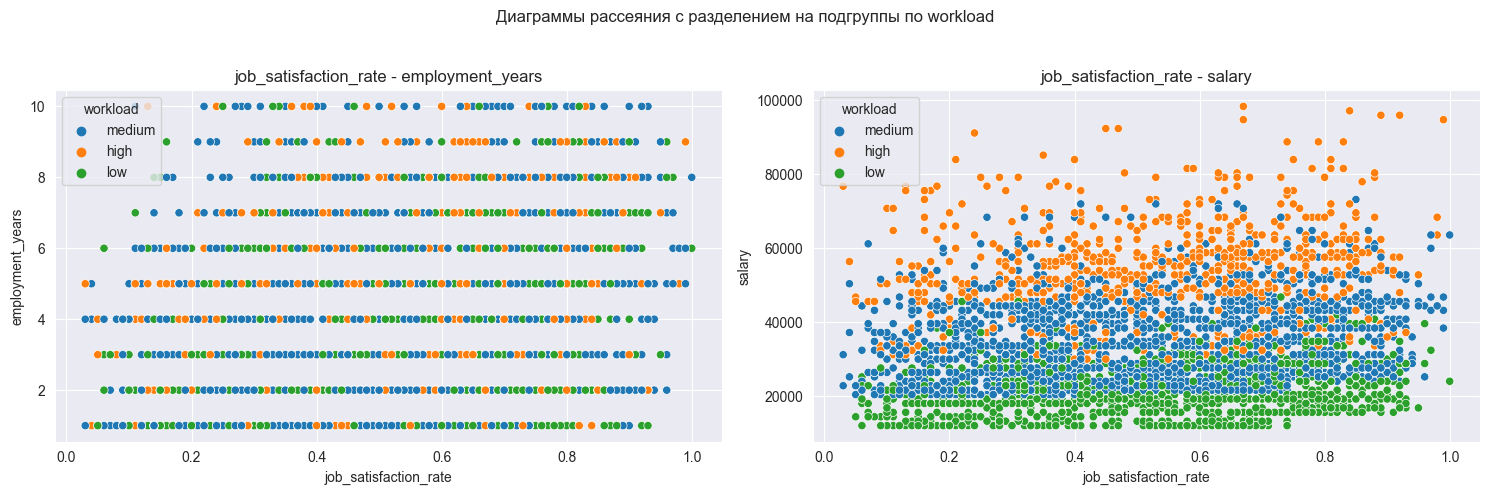

In [34]:
plot_scatter(train_job_satisfaction_rate, target, num_columns, q_columns)

* уровень удовлетворённости выше у тех, кого повышали за последний год
* уровень удовлетворённости меньше у тех, у кого были нарушения за последний год
* большинство отработавших менее 3 лет имеют уровень Junior
* чем выше уровень, тем выше зарплата
* чем выше оценка руководителя, тем выше уровень удовлетворъённости сотрудника

Проведём аналогичный анализ для тестовой выборки

Подготовим тестовую выборку

In [35]:
test = test_features

In [36]:
test.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

Добавим `job_satisfaction_rate`

In [37]:
test = test.merge(test_target_job_satisfaction_rate, on='id', how='left').set_index('id')
test.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   

        job_satisfaction_rate  
id                             
485046                   0.79  
686555                   0.72  
467458                   0.64  
418655                   0.60  
789145                   0.75

In [38]:
# считаем корреляции на датафрейме test
phik_overview = phik_matrix(test, interval_cols=con_columns) 

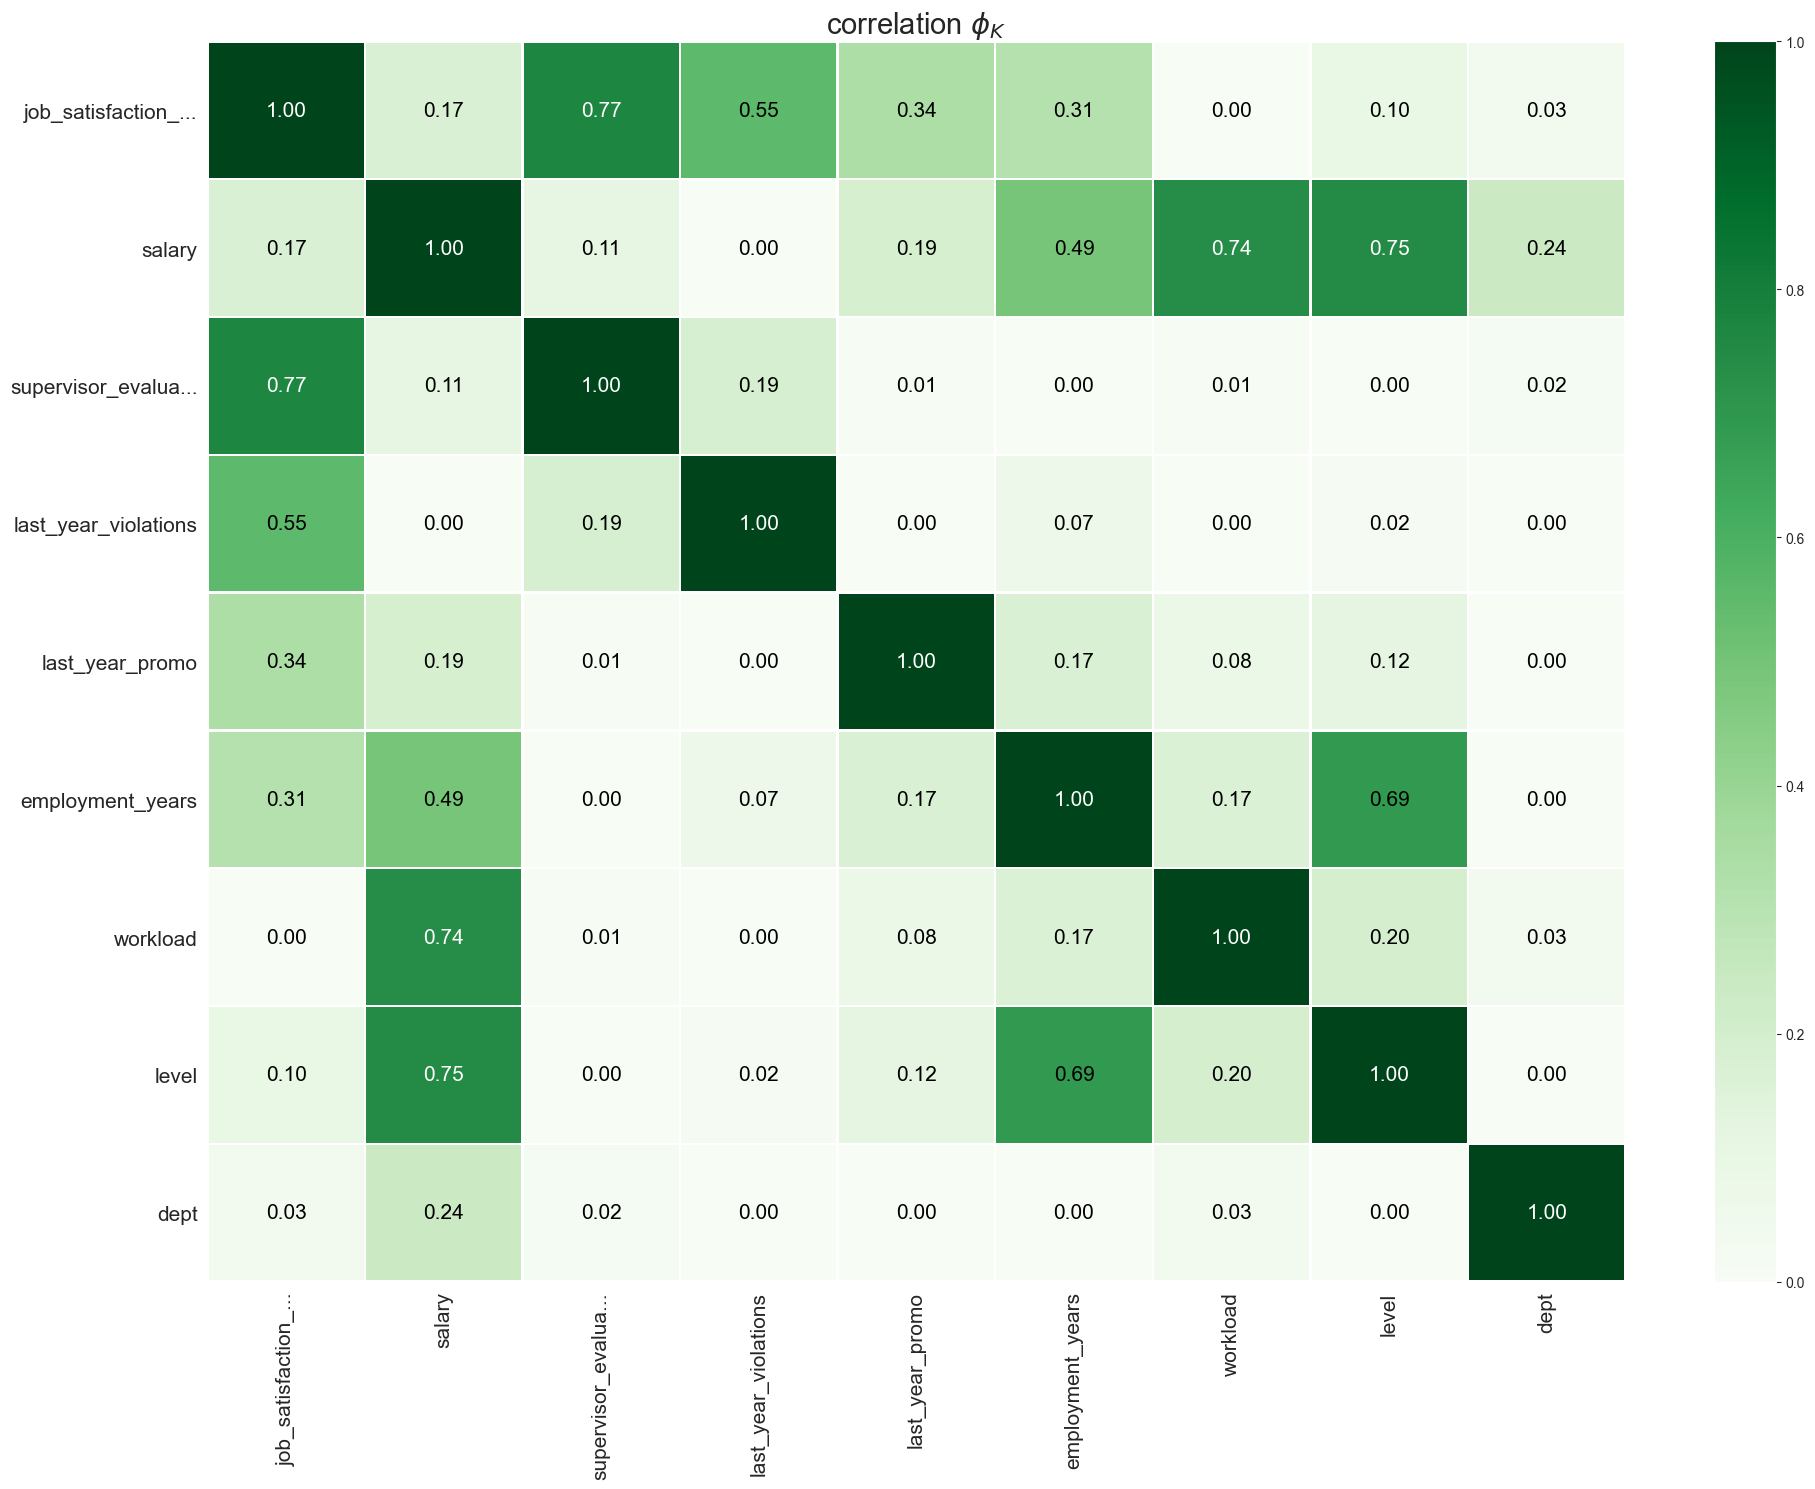

In [39]:
# отображаем матрицу корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [40]:
print('Список признаков в матрице корреляции:\n')
for col in test:
    print(col)

Список признаков в матрице корреляции:

dept
level
workload
employment_years
last_year_promo
last_year_violations
supervisor_evaluation
salary
job_satisfaction_rate


Посмотрим зависимости целевого признака от остальных для датафрейма `test`

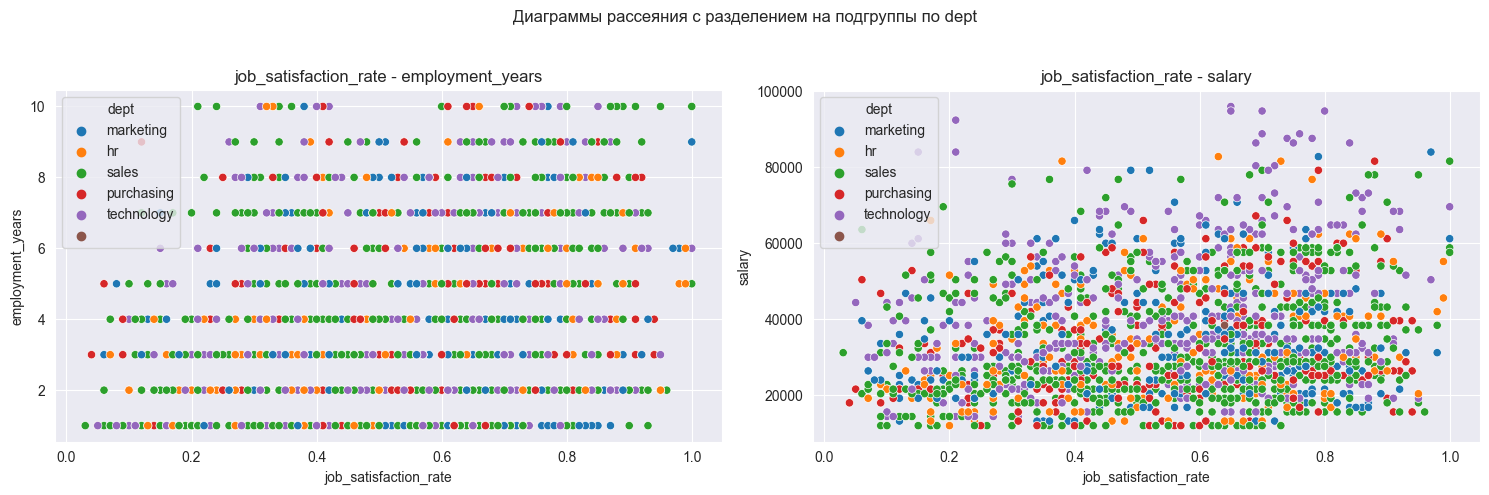

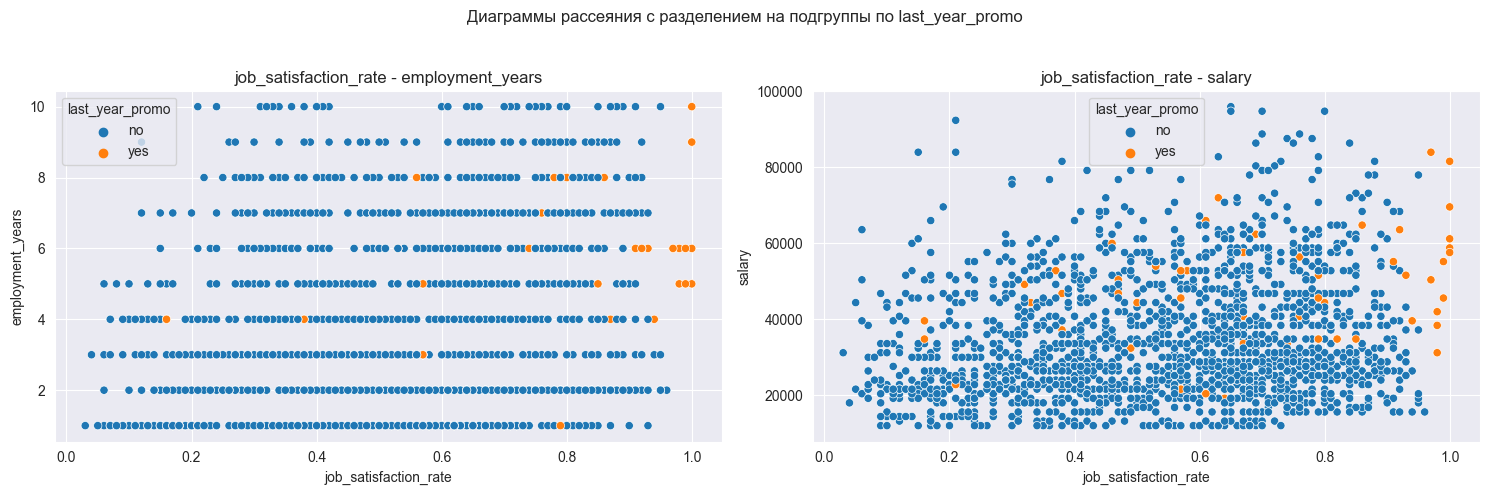

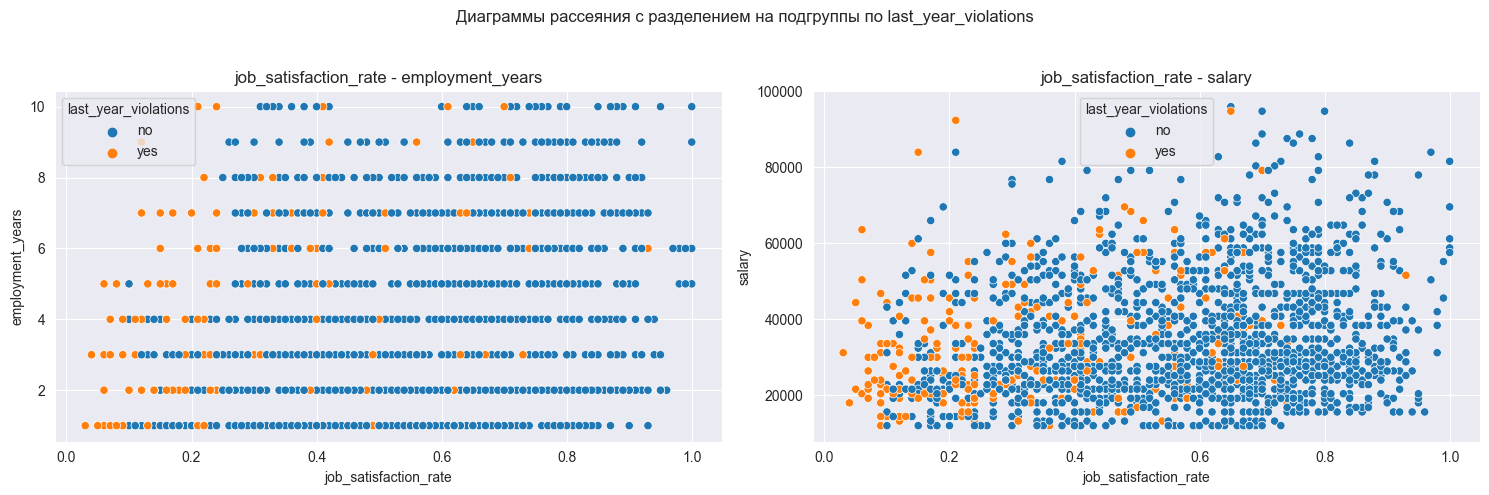

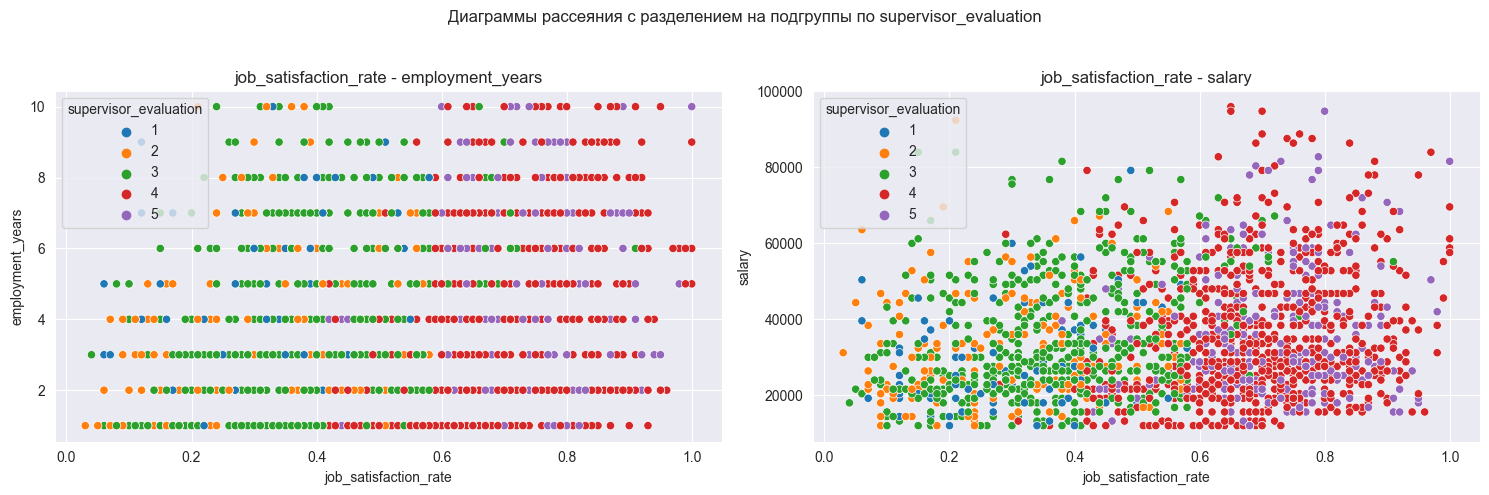

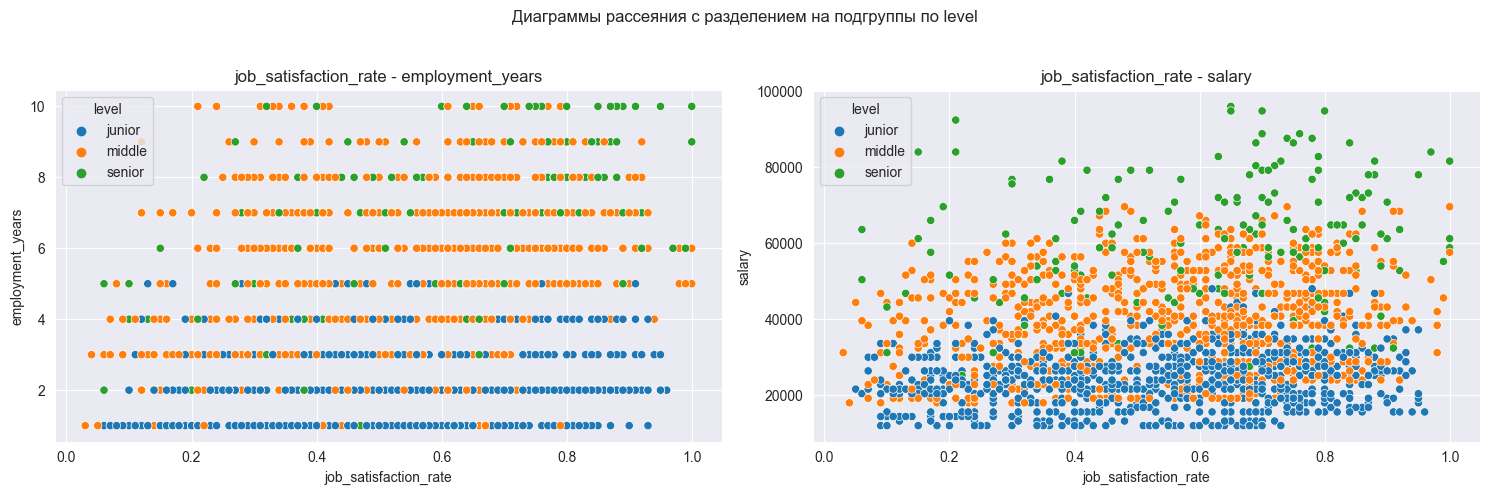

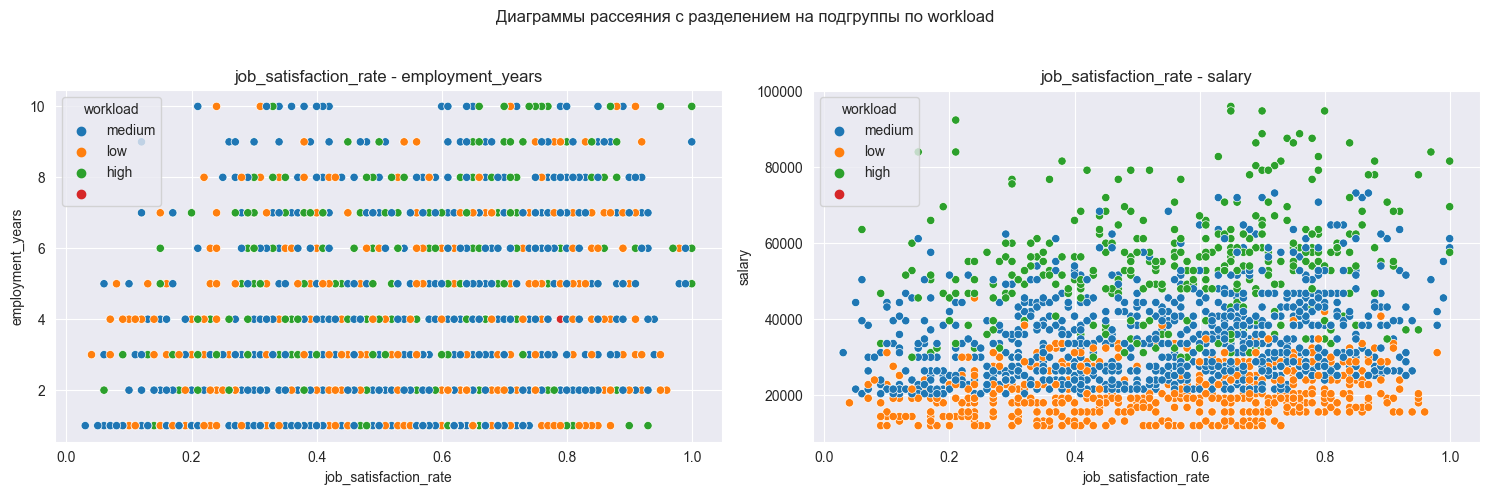

In [41]:
plot_scatter(test, target, num_columns, q_columns)

Зависимости и корреляция в тренировочных и тестовых данных имеют схожее распределение

**Вывод**

* Больше всего с целевым признаком корелируют: `supervisor_evaluation`, `last_year_violations`, `last_year_promo`, они окажут большее влияние на модель
* Меньше всего корелируют: `workload`, `level`, `dept`, они окажут минимальноее влияние на модель
* Мультиколлинеарность проявляется при значении кооэффициента корреляции от 0.9, а в нашем случае все значения значительно ниже, что говорит об отсутствии мультиколлинеарности

### Подготовка данных

Удалим из тренировочной выборки целевой признак

In [42]:
X_train = train_job_satisfaction_rate.drop(target, axis=1)

In [43]:
X_train.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
155278                   no                      1   24000  
653870                   no                      5   38400  
184592                   no                      2   12000  
171431                   no                      2   18000  
693419                   no                      3   22800

In [44]:
y_train = train_job_satisfaction_rate[target]

In [45]:
y_train.head()

id
155278    0.58
653870    0.76
184592    0.11
171431    0.37
693419    0.20
Name: job_satisfaction_rate, dtype: float64

#### Создадим пайплайн для обработки категориальных признаков

Создадим пайплайн для подготовки признаков из списка ohe_columns:

In [46]:
# Пайплайн для преобразования категориальных признаков в бинарные
ohe_pipe = Pipeline([
    # Предобработка данных
    ('preprocessing_pipeline', preprocessing_pipeline),
    # Кодирование категориальных признаков OneHotEncoder
    ('ohe', OneHotEncoder(
        handle_unknown='ignore'
    ))
])

Создадим пайплайн для подготовки признаков из списка ord_columns:

In [47]:
# Пайплайн для преобразования порядковых признаков
ord_pipe = Pipeline([
    # Предобработка данных
    ('preprocessing_pipeline', preprocessing_pipeline),
    # Кодирование ранговых признаков OrdinalEncoder
    ('ord', OrdinalEncoder(categories=[
        ['junior', 'middle', 'senior'],
        ['low', 'medium', 'high']
    ])),
    ('simpleImputer_after_ord', 
     SimpleImputer(strategy='most_frequent'))
])

#### Создаём общий пайплайн для подготовки данных

Объеденим пайплайны для подготовки данных

In [48]:
# Общий пайплайн для предобработки данных
date_preprocessing = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

#### Cоздаём итоговый пайплайн: подготовка данных и модель

Объеденим всё в итоговый пайплайн

In [49]:
# Создаем пайплайн для моделирования
pipe_final = Pipeline([
    ('preprocessor', date_preprocessing),
    ('model', None) 
])

### Обучение моделей

#### Обучим модели

Обучим 4 модели, подберём гиперпараметры.

Определим сетку параметров для подбора

In [50]:
param_grid = [
    # Параметры для модели DummyRegressor
    {
        'model': [DummyRegressor()],
        'preprocessor__num': [StandardScaler(),
                              MinMaxScaler(),
                              RobustScaler(),
                              'passthrough']
    },
    # Параметры для модели LinearRegression
    {
        'model': [LinearRegression()],
        'preprocessor__num': [StandardScaler(),
                              MinMaxScaler(),
                              RobustScaler(),
                              'passthrough']
    },
    # Параметры для модели DecisionTreeRegressor
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': [None] + [i for i in range(2, 7)], 
        'model__min_samples_split': range(1,6),
        'model__min_samples_leaf': range(2,6),
        'preprocessor__num': [StandardScaler(),
                              MinMaxScaler(),
                              RobustScaler(),
                              'passthrough']
    },
    # Параметры для модели GradientBoostingRegressor
    {
        'model': [GradientBoostingRegressor(random_state=RANDOM_STATE)],
        'model__n_estimators': range(20,50),
        'model__learning_rate': [0.01, 0.1, 0.5],
        'model__max_depth': [3, 5, 7],
        'preprocessor__num': [StandardScaler(),
                              MinMaxScaler(),
                              RobustScaler(),
                              'passthrough']
    }
]

Выберем лучшую модель и проверим её качество. Выбор сделаем на основе метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Для этого создадим метрику SMAPE для использования в `RandomizedSearchCV`, с использованием функции `smape`, параметр `greater_is_better` установим в `False`, т.к. в данном случае меньшее значение SMAPE указывает на более точные прогнозы модели, что соответствует лучшему качеству модели.

In [51]:
# Создаем метрику SMAPE для использования в RandomizedSearchCV
smape_scorer = make_scorer(smape, greater_is_better=False)

Используем эту метрику при подборе гиперпараметров и оценке качества моделей. 
Критерий успеха: SMAPE ≤15 на тестовой выборке.

#### Выберем лучшую модель и параметры с помощью `RandomizedSearchCV()`

Подготовим тестовую выборку, отсортируем датасеты `test_features` и `test_target_job_satisfaction_rate` по `id` и перенесём его в индекс

Подготовим тестовую выборку, аналогично тренировочной

In [52]:
X_test = test.drop(target, axis=1)

In [53]:
X_test.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
485046                   no                      5   28800  
686555                   no                      4   30000  
467458                   no                      4   19200  
418655                   no                      4   19200  
789145                   no                      5   40800

In [54]:
y_test = test[target]

In [55]:
y_test.head()

id
485046    0.79
686555    0.72
467458    0.64
418655    0.60
789145    0.75
Name: job_satisfaction_rate, dtype: float64

In [56]:
# Определяем объект RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring=smape_scorer,
    n_iter=10, 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [57]:
# Запускаем поиск по сетке
randomized_search.fit(X_train, y_train)

# Получаем лучшую модель
best_model = randomized_search.best_estimator_

# рассчитываем прогноз вероятностей классов на тестовых данных
predictions = best_model.predict(X_test)

# Выводим результаты
print('Лучшая модель и её параметры:\n\n', best_model)
print(f'Лучшее значение SMAPE на кросс-валидации: {abs(randomized_search.best_score_)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('preprocessing_pipeline',
                                                                   Pipeline(steps=[('replace_empty_with_nan',
                                                                                    ReplaceEmptyWithNaNTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
          

In [58]:
print(f'Значение SMAPE на тестовой выборке: {smape(y_test, predictions):.3f}')

Значение SMAPE на тестовой выборке: 11.399


Значение метрики SMAPE соответствует нашему критерию (SMAPE ≤15), модель успешно обучена.

Сохраним работу со всеми моделями, которые мы пробовали

In [59]:
randomized_search_results = pd.DataFrame(
    randomized_search.cv_results_
)

randomized_search_results[
    'mean_test_score'
] = abs(randomized_search_results['mean_test_score'])

randomized_search_results_smape_scorer = randomized_search_results.sort_values(
    by=['rank_test_score']
)

In [60]:
randomized_search_results_smape_scorer[['rank_test_score', 'param_model', 'mean_test_score']].head(10)

rank_test_score                                 param_model  \
1                1  GradientBoostingRegressor(random_state=42)   
3                2  GradientBoostingRegressor(random_state=42)   
9                3  GradientBoostingRegressor(random_state=42)   
4                4  GradientBoostingRegressor(random_state=42)   
0                5  GradientBoostingRegressor(random_state=42)   
6                6  GradientBoostingRegressor(random_state=42)   
5                7  GradientBoostingRegressor(random_state=42)   
8                8      DecisionTreeRegressor(random_state=42)   
2                9  GradientBoostingRegressor(random_state=42)   
7               10      DecisionTreeRegressor(random_state=42)   

   mean_test_score  
1        12.861027  
3        13.101604  
9        14.065929  
4        15.495512  
0        15.626770  
6        16.688253  
5        17.290032  
8        19.877846  
2        22.203111  
7        25.540118

Проверим важность признаков

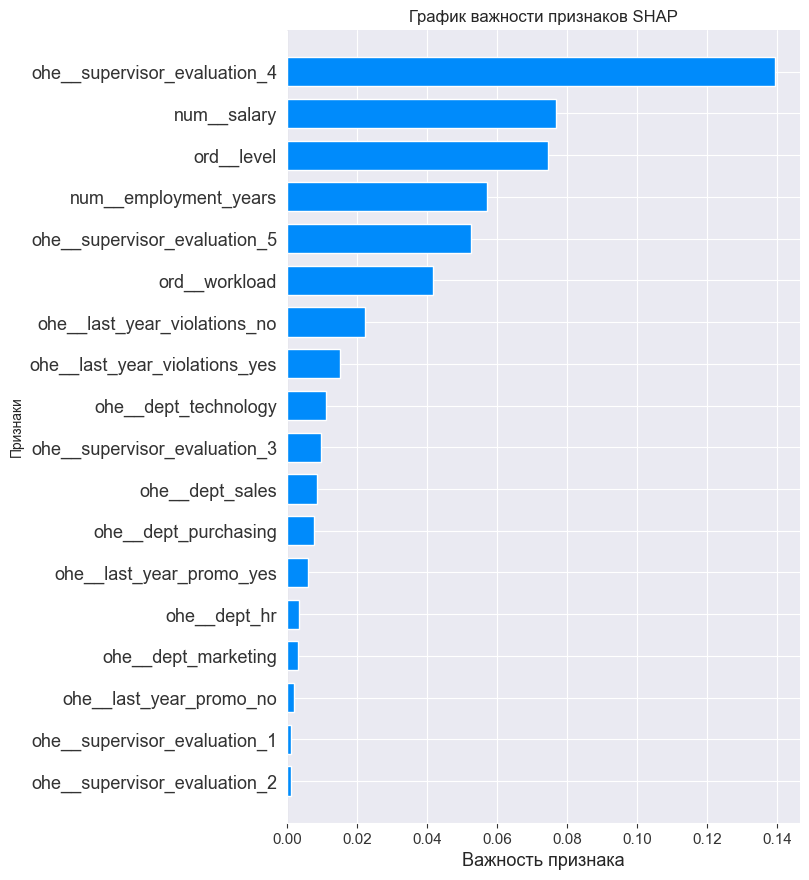

In [61]:
# Трансформация данных
transformed_data = best_model['preprocessor'].transform(X_train)
feature_names = best_model['preprocessor'].get_feature_names_out()

# Создание DataFrame для трансформированных данных
data = pd.DataFrame(transformed_data, columns=feature_names)

# Создание и использование TreeExplainer
explainer = shap.TreeExplainer(best_model['model'], data=data)
shap_values = explainer.shap_values(data, check_additivity=False)

# Инициализация JS для SHAP
shap.initjs()

# Создание DataFrame для значений SHAP
df_shap_values = pd.DataFrame(shap_values, columns=feature_names)

# Построение графика
shap.summary_plot(df_shap_values.values, feature_names, plot_type="bar", show=False)

# Добавление подписей к осям и заголовка графика
plt.xlabel('Важность признака')  
plt.ylabel('Признаки')    
plt.title('График важности признаков SHAP')  
plt.show()

### Вывод

В ходе поиска, лучшей моделью была определена `GradientBoostingRegressor`, со следующими параметрами: `learning_rate=0.5`, `max_depth=7`, `n_estimators=22`, на тестовой выборке показатель метрики `SMAPE` составил 11.399.

Наиболее важыми признаками для прогнозирования уровня удовлетворённости сотрудников работой в компании оказались: оценка качества работы сотрудника (4,5), ежемесячная зарплата сотрудника, уровень занимаемой должности, длительность работы в компании, уровень загруженности сотрудника.

## Предсказание увольнения сотрудника из компании
Для этой задачи используем те же входные признаки, что и в предыдущей задаче. 

Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

### Загрузка данных

#### Загрузим данные

Считаем CSV-файлы в датафреймы

In [62]:
# Чтение файлов и создание датафреймов
files = [
    'train_quit.csv',
    'test_target_quit.csv'
]

dfs_2 = []

for file_name in files:
    local_file_path = local_path + file_name
    online_file_path = online_path + file_name
    try:
        if os.path.exists(local_file_path):
            df = pd.read_csv(local_file_path)
            print(f"Данные загружены из локальной директории: {file_name}")
        else:
            df = pd.read_csv(online_file_path)
            print(f"Данные загружены из сети: {file_name}")

        # Получение имени датафрейма из имени файла
        df_name = file_name.split('.')[0]
        # Присвоение датафрейму имени    
        globals()[df_name] = df  
        df.name = df_name
        # Добавление датафрейма в список dfs_2   
        dfs_2.append(df)           
    except Exception as e:
        print(f"Произошла ошибка при чтении файла {file_name}: {e}")

Данные загружены из локальной директории: train_quit.csv
Данные загружены из локальной директории: test_target_quit.csv


Целевой признак тестовой выборки:

In [63]:
# задаём целевой признак
target = 'quit'

#### Проверим соответствие данных описанию

Применим к датафреймам функцию `info_func`

In [64]:
for df in dfs_2:
    info_func(df)

---------------------- Исходный датафрейм train_quit ----------------------


id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no



------------ Общая информация о датафрейме train_quit ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
---------------------- Исходный датафрейм test_target_quit ----------------------


id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes



------------ Общая информация о датафрейме test_target_quit ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### Вывод

* Датафрейм `train_quit` содержит 4000 строк
* Датафрейм `test_target_quit` содержит 2000 строк

Данные во всех датафреймах соответствуют описанию.

### Предобработка данных

#### Проверим данные на наличие пропусков и явных дубликатов

Применим функцию `check_func` к нашим датафреймам

In [65]:
for df in dfs_2:
    check_func(df)

---------- Количество пустых значений в датафрейме train_quit ----------




id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

---------- Количество явных дубликатов в датафрейме train_quit ----------


0

---------- Количество пустых значений в датафрейме test_target_quit ----------




id      0
quit    0
dtype: int64

---------- Количество явных дубликатов в датафрейме test_target_quit ----------


0

Пропущенные значения и явные дубликаты отсутствуют

#### Проверим данные на наличие неявных дубликатов и обработаем их

Применим функцию `df_unique` к нашим датафреймам

In [66]:
for df in dfs_2:
    print(f'Датафрейм: {df.name}')
    print()
    df_unique(df)

Датафрейм: train_quit

Список уникальных значений в столбце: dept:
['sales' 'purchasing' 'marketing' 'technology' 'hr']

Список уникальных значений в столбце: level:
['middle' 'junior' 'sinior']

Список уникальных значений в столбце: workload:
['high' 'medium' 'low']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Список уникальных значений в столбце: quit:
['no' 'yes']

Датафрейм: test_target_quit

Список уникальных значений в столбце: quit:
['yes' 'no']



Заменим `sinior` на `senior` в столбце `level` датафрейма `train_quit`

In [67]:
train_quit['level'] = train_quit['level']\
.replace('sinior', 'senior')

In [68]:
df_unique(train_quit)

Список уникальных значений в столбце: dept:
['sales' 'purchasing' 'marketing' 'technology' 'hr']

Список уникальных значений в столбце: level:
['middle' 'junior' 'senior']

Список уникальных значений в столбце: workload:
['high' 'medium' 'low']

Список уникальных значений в столбце: last_year_promo:
['no' 'yes']

Список уникальных значений в столбце: last_year_violations:
['no' 'yes']

Список уникальных значений в столбце: quit:
['no' 'yes']



#### Вывод

В датафрейме `train_quit` в столбце `level` заменили `sinior` на `senior`

### Исследовательский анализ данных

#### Построим графики для наших датасетов и выведем описательную статистику для числовых признаков

Применим функцию `visualize_data` к нашим датафреймам для построения гистограмм для числовых признаков и круговых диаграмм для категориальных признаков и для вывода описательной статистики числовых признаков

In [69]:
# Зададим диссскретные признаки
dis_columns = ['employment_years', 'supervisor_evaluation']

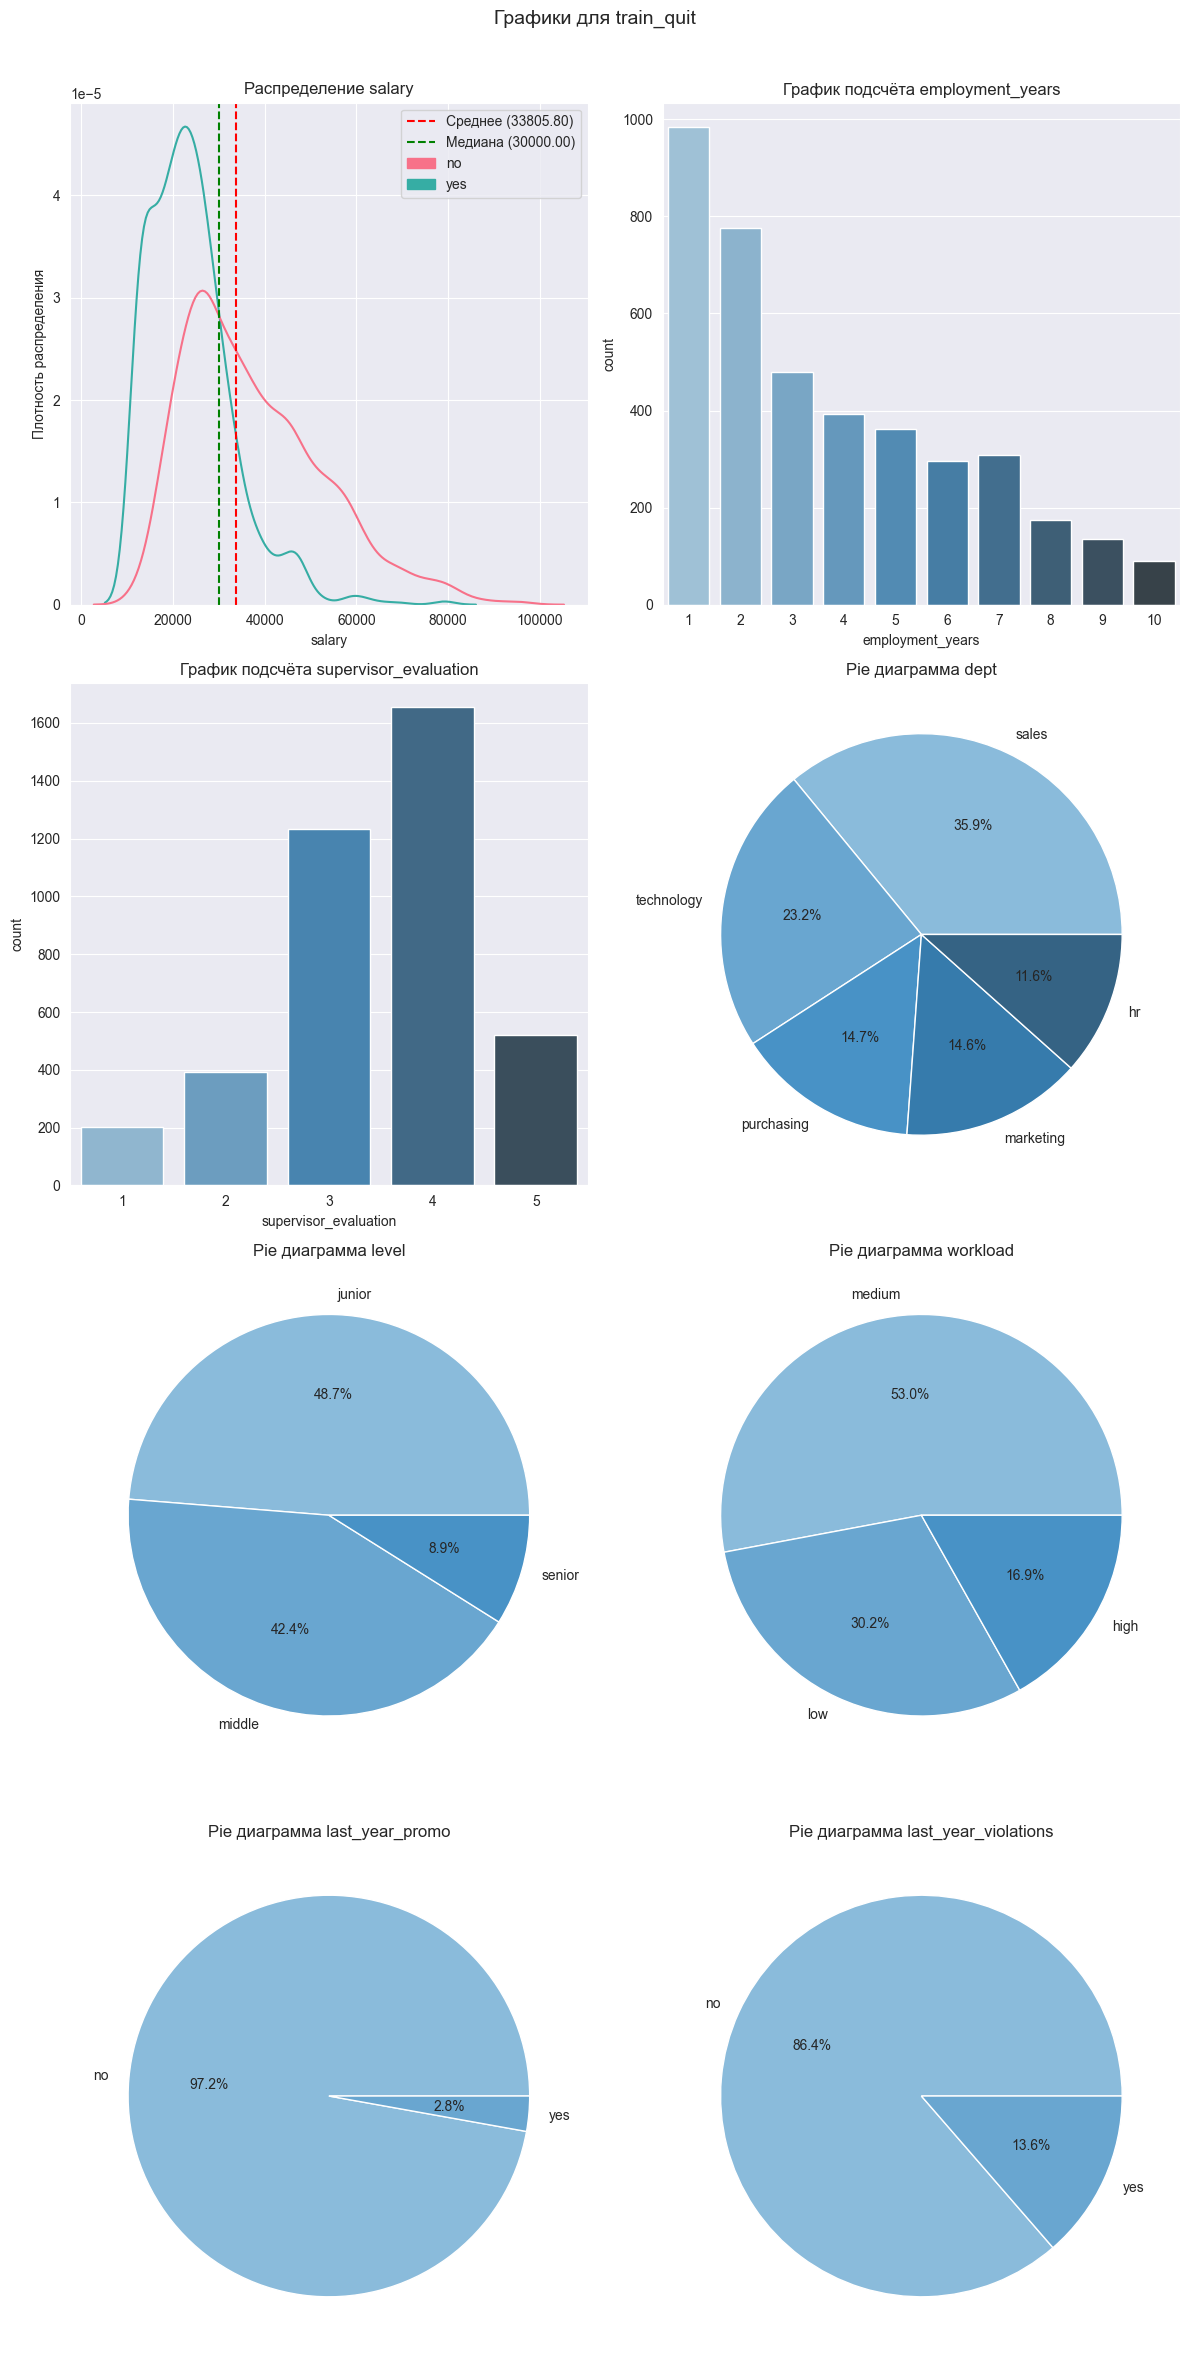

Описательная статистика для непрерывных признаков: train_quit


count         mean           std      min      25%  \
salary                 4000.0  33805.80000  15152.415163  12000.0  22800.0   
employment_years       4000.0      3.70150      2.541852      1.0      2.0   
supervisor_evaluation  4000.0      3.47475      1.004049      1.0      3.0   

                           50%      75%      max  
salary                 30000.0  43200.0  96000.0  
employment_years           3.0      6.0     10.0  
supervisor_evaluation      4.0      4.0      5.0

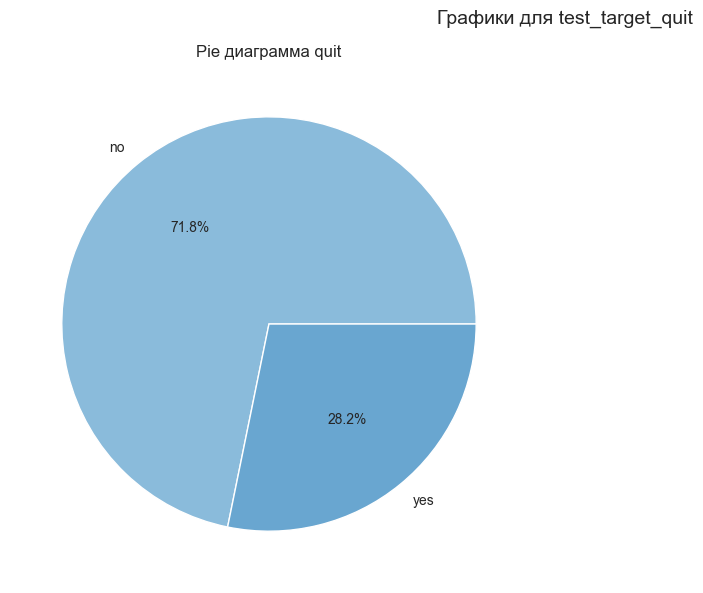

In [70]:
for df in dfs_2:
    visualize_data(df, dis_columns, target)

* `employment_years`, `supervisor_evaluation` и `salary` похожи на распределения Пуассона. 
* `supervisor_evaluation` - ранговый признак
* наблюдается дисбаланс классов в `quit`

#### Корреляционный анализ

Не все наши признаки имеют нормальное распределение и часть признаков является категориальными, используем библиотеку phik для рассчёта корреляции между признаками разных типов данных

In [71]:
# переведим id  в индекс
train_quit = train_quit.set_index('id')

Проверим наличие дубликатов

In [72]:
train_quit.duplicated().sum()

1413

Удалим дубликаты

In [73]:
train_quit = train_quit.drop_duplicates()

Повторим проверку на наличие дубликатов

In [74]:
train_quit.duplicated().sum()

0

In [75]:
train_quit.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
723290                   no                      4   54000   no  
814010                   no                      4   27600   no  
155091                   no                      1   37200   no  
257132                  yes                      3   24000  yes  
910140                   no                      5   25200   no

In [76]:
# создаём список с наименованиями непрерывных признаков
con_columns = ['salary']

In [77]:
# считаем корреляции на датафрейме market
phik_overview = phik_matrix(train_quit, interval_cols=con_columns)

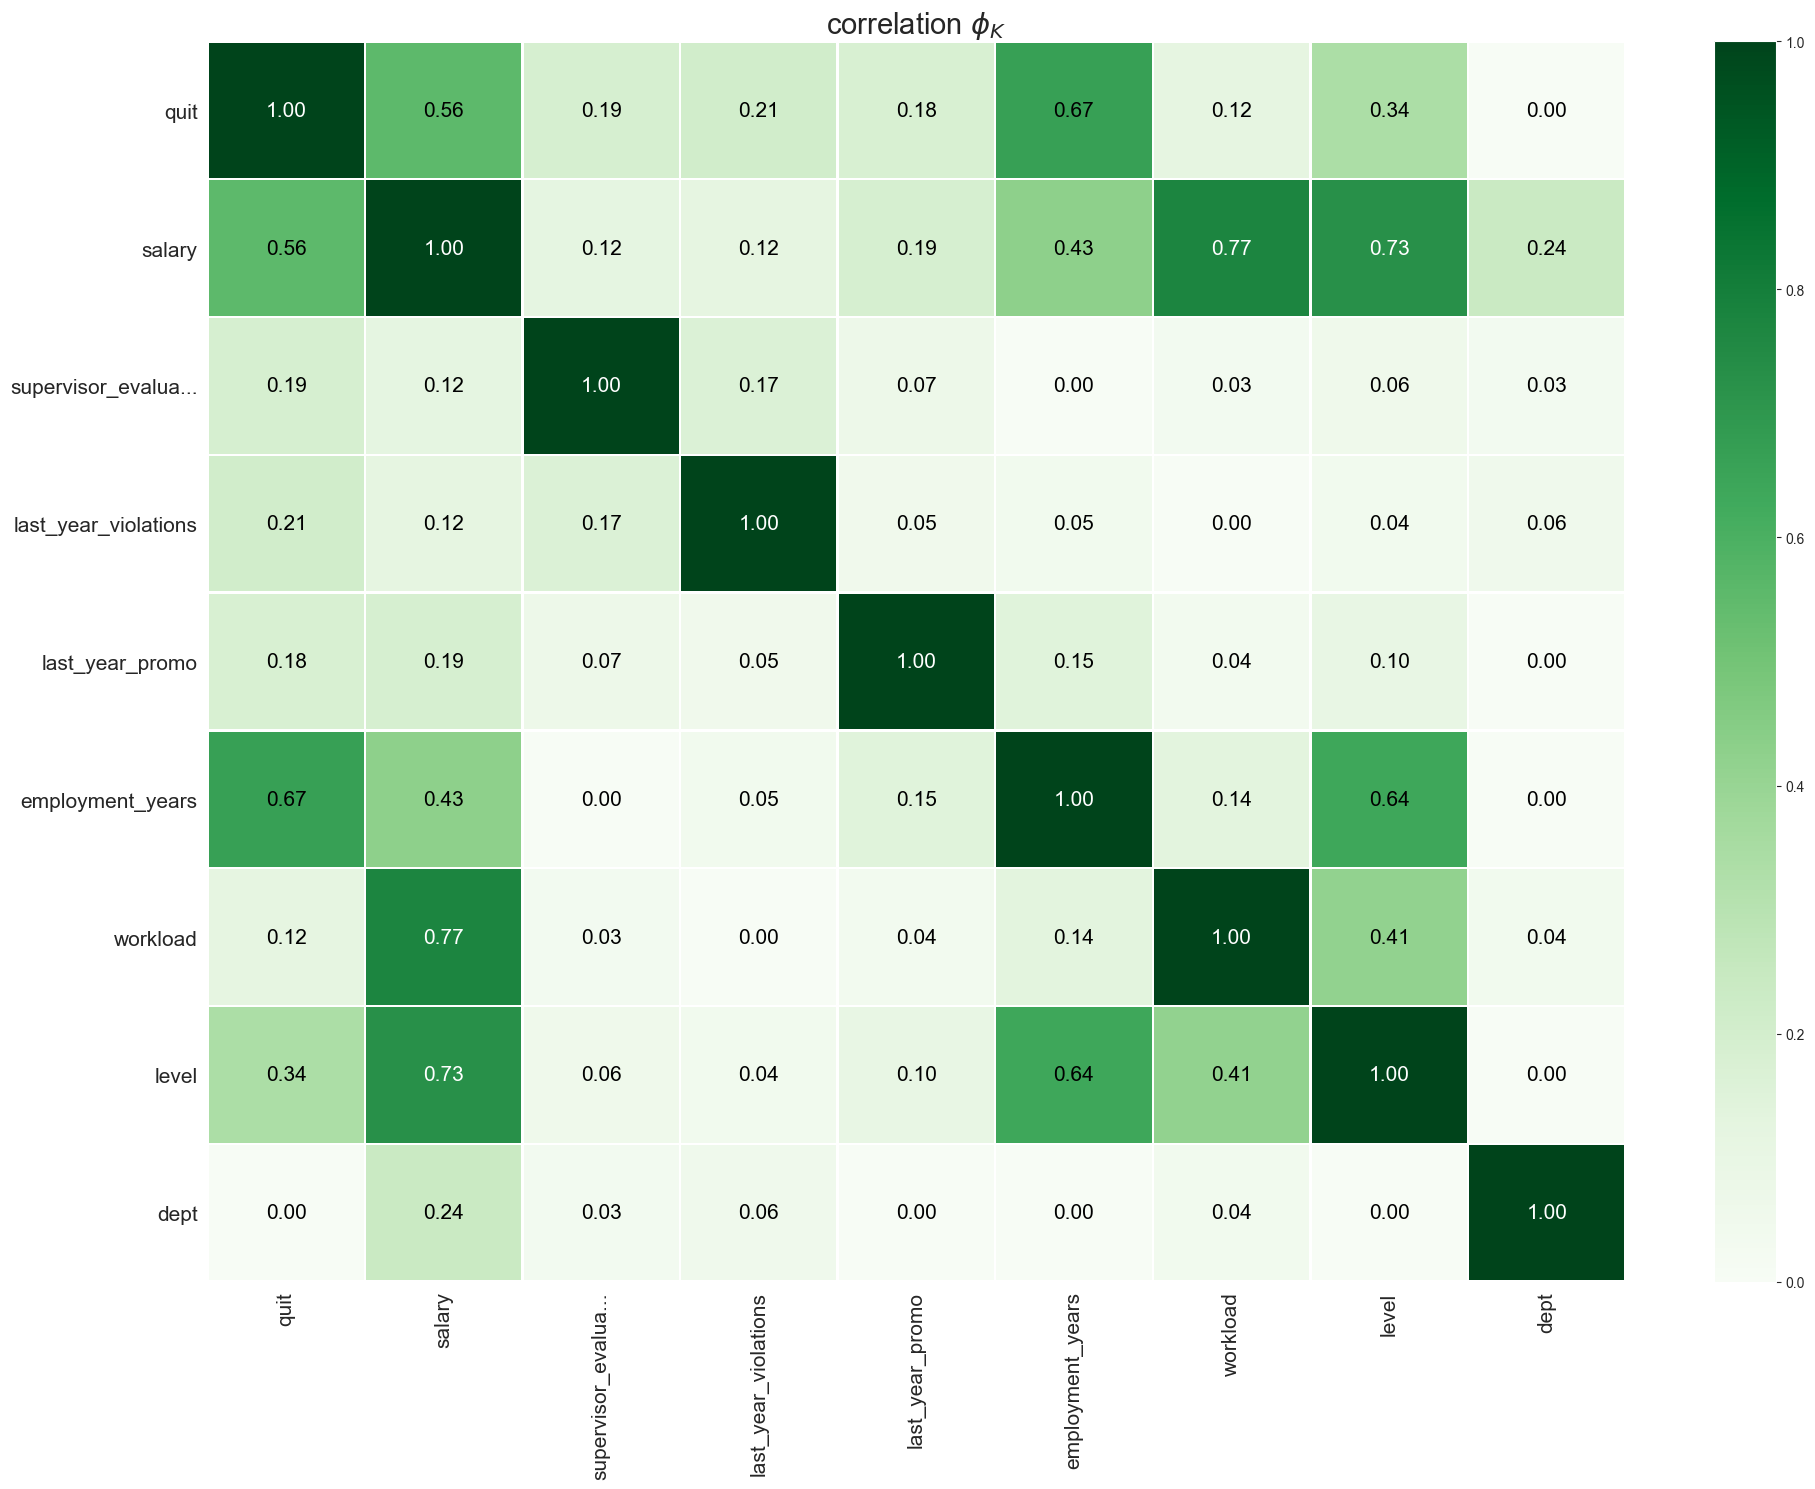

In [78]:
# отображаем матрицу корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [79]:
print('Список признаков в матрице корреляции:\n')
for col in train_quit:
    print(col)

Список признаков в матрице корреляции:

dept
level
workload
employment_years
last_year_promo
last_year_violations
supervisor_evaluation
salary
quit


* Больше всего с целевым признаком корелируют: `salary`, `employment_years`, они окажут большее влияние на модель
* Меньше всего корелируют: `dept`, `workload`, они окажут минимальноее влияние на модель
* Мультиколлинеарность проявляется при значении кооэффициента корреляции от 0.9, а в нашем случае все значения значительно ниже, что говорит об отсутствии мультиколлинеарности

#### Составим портрет «уволившегося сотрудника»

In [80]:
train_quit.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary', 'quit'],
      dtype='object')

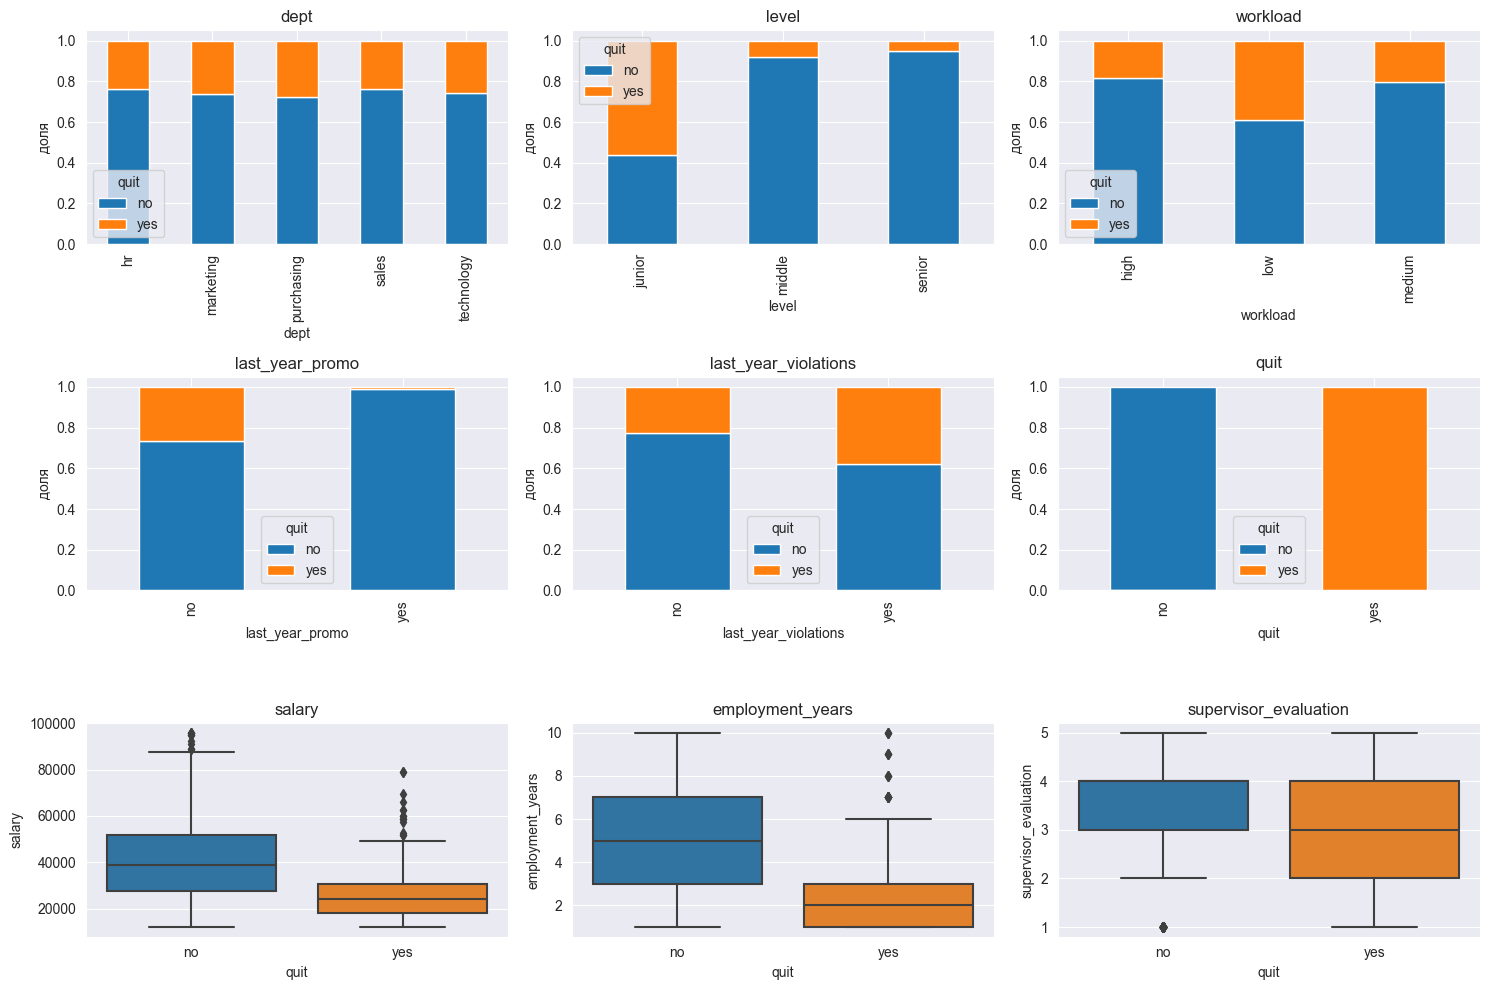

In [81]:
# Устанавливаем размеры графиков
plt.figure(figsize=(15, 10))

# Анализ категориальных/дискретных признаков
categorical_columns = train_quit.select_dtypes(include=['object']).columns.tolist()
categorical_columns += dis_columns

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)  # Создаем подграфик
    counts = train_quit.groupby(column)['quit'].value_counts(normalize=True).unstack()
    counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(column)  # Заголовок подграфика
    plt.ylabel('доля')  # Подпись оси Y

# Анализ числовых признаков
numerical_columns = train_quit.select_dtypes(include=['int', 'float']).columns
numerical_columns = list(set(numerical_columns) - set(dis_columns))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, len(categorical_columns) + i + 1)  # Создаем подграфик
    sns.boxplot(data=train_quit, x='quit', y=column)
    plt.title(column)  # Заголовок подграфика
    plt.ylabel(column)  # Подпись оси Y

plt.tight_layout()  # Автоматически настраиваем расположение графиков
plt.show()  # Показываем графики

In [82]:
# Группируем данные по столбцу 'quit' и вычисляем среднюю зарплату для каждой группы
train_quit.groupby('quit')['salary'].mean()

quit
no     40952.173913
yes    25767.938931
Name: salary, dtype: float64

Потрет уволившегося сотрудника:

* работает в отделе `purchasing` или `marketing`
* уровень занимаемой должности `junior`
* уровень загруженности `low`
* отработал в компании менее 4 лет
* за последний год у него не было повышения
* за последний год у него было нарушение трудового договора
* руководитель ему дал оценку качества работы менее 4
* заработная плата в среднем 23885

#### Проверим зависимость целевых признаков

Проверим утверждение аналитиков, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. 

Сформулируем гипотезы:
* $H_0$ - уровень удовлетворённости сотрудника работой в компании не влияет на то, уволится ли сотрудник или нет
* $H_1$ - уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник или нет

Выберем уровень статистической значимости равный 1%

In [83]:
alpha = 0.01

Подготовим тестовую выборку

In [84]:
test_2 = test_features.set_index('id')

Добавим предсказания `job_satisfaction_rate` по лучшей обученной модели 

In [85]:
test_2['job_satisfaction_rate']=best_model.predict(test)

In [86]:
test_2.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   

        job_satisfaction_rate  
id                             
485046               0.868999  
686555               0.677250  
467458               0.634616  
418655               0.655663  
789145               0.812172

Добавим `quit`

In [87]:
test_2 = test_2.merge(test_target_quit, on='id', how='left')
test_2.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800               0.868999   
1                   no                      4   30000               0.677250   
2                   no                      4   19200               0.634616   
3                   no                      4   19200               0.655663   
4                   no                      5   40800               0.812172   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

Разделяем данные на две группы: те, кто ушел, и те, кто остался

In [88]:
quit_group = test_2[test_2['quit'] == 'yes']['job_satisfaction_rate']
non_quit_group = test_2[test_2['quit'] == 'no']['job_satisfaction_rate']

Построим график плотности распределения `job_satisfaction_rate` и `quit`. Проведём проверку гипотезы

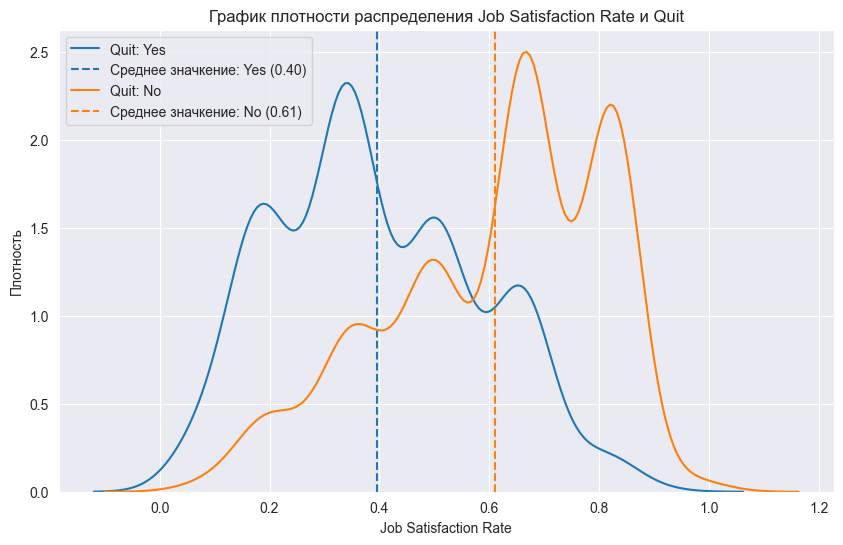

Результаты t-теста:
p-value: 3.850941988516833e-98
Отвергаем нулевую гипотезу: уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник или нет


In [89]:
# Устанавливаем размеры графика
plt.figure(figsize=(10, 6))

# Группируем данные по столбцу 'quit' и строим графики KDE для каждой группы
kde_plot = sns.kdeplot(quit_group, label='Quit: Yes')

# Получаем цвет текущей линии из цветовой палитры seaborn
line_color = kde_plot.lines[-1].get_color()

# Вычисляем среднее значение для текущей группы
mean_job_satisfaction = np.mean(quit_group)
    
# Добавляем вертикальную линию среднего значения с цветом текущей линии
plt.axvline(x=mean_job_satisfaction, color=line_color, linestyle='--', label=f'Среднее значкение: Yes ({mean_job_satisfaction:.2f})')

kde_plot = sns.kdeplot(non_quit_group, label='Quit: No')

# Получаем цвет текущей линии из цветовой палитры seaborn
line_color = kde_plot.lines[-1].get_color()

# Вычисляем среднее значение для текущей группы
mean_job_satisfaction = np.mean(non_quit_group)
    
# Добавляем вертикальную линию среднего значения с цветом текущей линии
plt.axvline(x=mean_job_satisfaction, color=line_color, linestyle='--', label=f'Среднее значкение: No ({mean_job_satisfaction:.2f})')


# Настройки графика
plt.title('График плотности распределения Job Satisfaction Rate и Quit')
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Плотность')
plt.legend()

# Отображаем график
plt.show()

# Выполняем t-тест для сравнения средних значений между двумя группами
results = st.ttest_ind(
    quit_group, 
    non_quit_group)

# Выводим результаты теста
print("Результаты t-теста:")
print(f"p-value: {results.pvalue}")
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник или нет")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств, что уровень удовлетворённости сотрудника работой в компании не влияет на то, уволится ли сотрудник или нет")

Уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник или нет. Удовлетворённость работой у уволившихся сотрудников существенно ниже оставшихся в компании

### Добавление нового входного признака
Добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам этой задачи.

In [90]:
X_train_2 = train_quit.drop(target, axis=1)

In [91]:
X_train_2['job_satisfaction_rate'] = best_model.predict(X_train_2)

In [92]:
X_train_2.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
723290                   no                      4   54000   
814010                   no                      4   27600   
155091                   no                      1   37200   
257132                  yes                      3   24000   
910140                   no                      5   25200   

        job_satisfaction_rate  
id                             
723290               0.661224  
814010               0.839533  
155091               0.383935  
257132               0.351504  
910140               0.719264

In [93]:
y_train_2 = train_quit[target]

In [94]:
y_train_2.head()

id
723290     no
814010     no
155091     no
257132    yes
910140     no
Name: quit, dtype: object

### Подготовка данных
Подготовим признаки с помощью существующих пайплайнов

In [95]:
ohe_columns

['dept', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']

In [96]:
ord_columns

['level', 'workload']

In [97]:
num_columns

['employment_years', 'salary']

добавим `job_satisfaction_rate`

In [98]:
num_columns.append('job_satisfaction_rate')

In [99]:
num_columns

['employment_years', 'salary', 'job_satisfaction_rate']

### Обучение модели
Обучим четыре модели, подберём для них гиперпараметры. Проверим качество лучшей модели метрикой оценки качества — ROC-AUC. Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.

Определим сетку параметров для подбора

In [100]:
param_grid_2 = [
    # Словарь для DummyClassifier
    {
        'model': [DummyClassifier(strategy='uniform')],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ]  
    },
    # Словарь для DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': [None] + [i for i in range(2, 7)],
        'model__max_features': range(2, 7),
        'preprocessor__num': [StandardScaler(),
                              MinMaxScaler(),
                              RobustScaler(),
                              'passthrough']  
    },

    # Словарь для KNeighborsClassifier() 
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(5, 20),
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough']   
    },

    # Словарь для LogisticRegression()
    {
        'model': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'model__C': range(1, 10),
        'preprocessor__num': [
            StandardScaler(), 
            MinMaxScaler(), 
            RobustScaler(), 
            'passthrough'
        ]  
    },
    # Словарь для SVC() 
   {
       'model': [SVC(random_state=RANDOM_STATE,
                      kernel='poly',
                      probability=True)],
       'model__C': range(5, 20),
       'preprocessor__num': [
           StandardScaler(),
           MinMaxScaler(),
           RobustScaler(),
           'passthrough'
       ]  
   },
    # Словарь для RandomForestClassifier()
   {
       'model': [RandomForestClassifier(random_state=RANDOM_STATE)],
       'model__n_estimators': range(50,100),
       'model__max_depth': [None] + [i for i in range(2, 7)],
       'model__max_features': ['auto', 'sqrt', 'log2'],
       'preprocessor__num': [
           StandardScaler(),
           MinMaxScaler(),
           RobustScaler(),
           'passthrough'
       ]  
   }
]

In [101]:
# определяем объект RandomizedSearchCV
randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid_2, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

Подготовим тестовые данные:

In [102]:
X_test_2 = test_2.drop(target, axis=1).set_index('id')

In [103]:
X_test_2.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   

        job_satisfaction_rate  
id                             
485046               0.868999  
686555               0.677250  
467458               0.634616  
418655               0.655663  
789145               0.812172

In [104]:
y_test_2 = test_2[target]

In [105]:
y_test_2.head()

0    no
1    no
2    no
3    no
4    no
Name: quit, dtype: object

In [106]:
# запускаем поиск по сетке
randomized_search_2.fit(X_train_2, y_train_2)

# получаем лучшую модель
best_model_2 = randomized_search_2.best_estimator_

# рассчитываем прогноз вероятностей классов на тестовых данных
probabilities = best_model_2.predict_proba(X_test_2)
probabilities_one = probabilities[:, 1]

# выводим результаты
print('Лучшая модель и её параметры:\n\n', best_model_2)
print(f'Метрика ROC-AUC лучшей модели на кросс-валидации: {randomized_search_2.best_score_}')
print(f'Площадь ROC-кривой лучшей модели на тестовой выборке:', roc_auc_score(y_test_2, probabilities_one))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('preprocessing_pipeline',
                                                                   Pipeline(steps=[('replace_empty_with_nan',
                                                                                    ReplaceEmptyWithNaNTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent'))])),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
          

Метрика соответствует нашему критерию качества модели (ROC-AUC ≥0.91), модель успешно обучена.

In [107]:
randomized_search_results_2 = pd.DataFrame(
    randomized_search_2.cv_results_
)

randomized_search_results_2[
    'mean_test_score'
] = randomized_search_results_2['mean_test_score']

randomized_search_results_smape_scorer_2 = randomized_search_results_2.sort_values(
    by=['rank_test_score']
)

In [108]:
randomized_search_results_smape_scorer_2[['rank_test_score', 'param_model', 'mean_test_score']].head(8)

rank_test_score                              param_model  mean_test_score
6                1  RandomForestClassifier(random_state=42)         0.920171
1                2  RandomForestClassifier(random_state=42)         0.920042
0                3  RandomForestClassifier(random_state=42)         0.918700
7                4  RandomForestClassifier(random_state=42)         0.918130
3                5  RandomForestClassifier(random_state=42)         0.904662
5                5  RandomForestClassifier(random_state=42)         0.904662
4                7  RandomForestClassifier(random_state=42)         0.904129
2                8  RandomForestClassifier(random_state=42)         0.882371

Проверим важность признаков

100%|===================| 5159/5174 [00:22<00:00]        

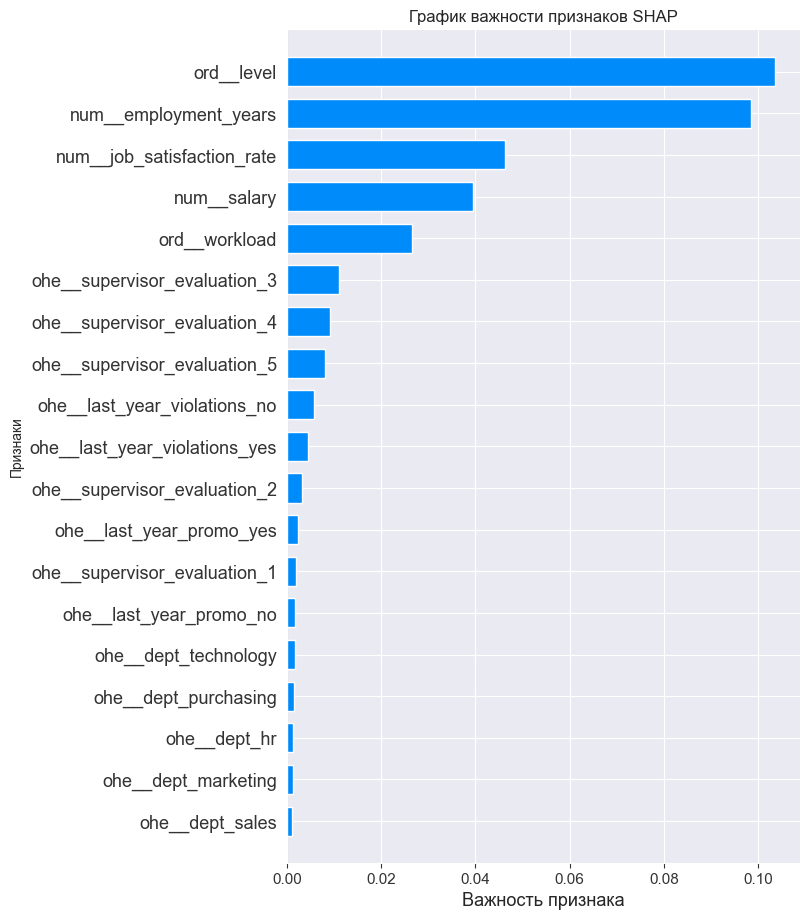

In [109]:
# Трансформация данных
transformed_data = best_model_2['preprocessor'].transform(X_train_2)
feature_names = best_model_2['preprocessor'].get_feature_names_out()

# Создание DataFrame для трансформированных данных
data = pd.DataFrame(transformed_data, columns=feature_names)

# Создание и использование TreeExplainer
explainer = shap.TreeExplainer(best_model_2['model'], data=data)
shap_values = explainer.shap_values(data, check_additivity=False)

# Инициализация JS для SHAP
shap.initjs()

shap_values_single_output = shap_values[:, :, 1]
# Создание DataFrame для значений SHAP
df_shap_values = pd.DataFrame(shap_values_single_output, columns=feature_names)

# Построение графика
shap.summary_plot(df_shap_values.values, feature_names, plot_type="bar", show=False)

# Добавление подписей к осям и заголовка графика
plt.xlabel('Важность признака')  
plt.ylabel('Признаки')    
plt.title('График важности признаков SHAP')  
plt.show()

### Вывод

В ходе поиска, лучшей моделью была определена `RandomForestClassifier`, со следующими параметрами: `max_depth=5`, `max_features='log2'`, `n_estimators=73`, на тестовой выборке площадь `ROC-кривой` составила 0.924.

Наиболее важыми признаками для прогнозирования уволится сотрудник или нет, оказались: уровень занимаемой должности, длительность работы в компании, уровень удовлетворённости сотрудника работой в компании, ежемесячная зарплата сотрудника, уровень загруженности сотрудника.

## Общий вывод

В ходе работы над проектом были решены поставленные нам задачи:
1. предсказание уровня удовлетворённости сотрудника работой на основе данных, предоставленных компанией.

2. предсказание факта уволится ли сотрудник из компании или останется на своей должности

В обеих задачах используются данные о характеристиках сотрудников компании, включая информацию, полученную из опросников об уровне удовлетворённости работой. Модели машинного обучения обучаются на этих данных для того, чтобы предсказать соответствующие метрики.

**Этапы работы:**

1. **Загрузка данных** 
Данные в представленных файлах соответствовали описанию, явных дубликатов не обнаружено. 

2. **Предобработка данных** 
В датасетах `train_job_satisfaction_rate` и `test_features` были обнаружены пропущенные значения и пустые строки, для их устранения был написан пайплайн `preprocessing_pipeline`

3. **Исследовательский анализ**  
 1. Факторы, влияющие на уровень удовлетворённости сотрудников: 
  * Повышение в прошлом году или отсутствие замечаний за нарушения являются значимыми факторами для уровня удовлетворенности сотрудников.
  * Оценка качества работы руководителя также сильно коррелирует с уровнем удовлетворенности.
 2. Факторы, влияющие на решение сотрудника об увольнении:
  * Отмечается, что более половины сотрудников увольняются в первые три года работы в компании. Это типичное явление, характеризующееся как "классическая текучка кадров".
  * Зарплата сотрудников также существенно влияет на решение об увольнении, особенно если она не соответствует ожиданиям.
 3. Профиль уволившегося сотрудника: 
  * Уволившиеся сотрудники чаще всего работали в отделе закупок или маркетинга, занимали низшие должности (junior) и имели низкую или среднюю загруженность.
  * Также их средняя заработная плата была значительно ниже среднего уровня в компании, что может указывать на недовольство условиями оплаты труда.

4. **Подготовка данных** В подготовке данных мы использовали написанный ранее пайплайн и добавили новые пайплайны для кодирования и масштабирования: OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, создали новую метрику SMAPE

5. **Обучение модели**
 1. для первой задачи мы обучили 2 модели: `LinearRegression` и `DecisionTreeRegressor`, для кросс-валидации использовали метрику `SAMPE`
 2. для второй задачи обучили 4 модели: `DecisionTreeClassifier`, `KNeighborsClassifier`, `LogisticRegression` и `SVC`, для кросс-валидации использовали метрику`ROC-AUC`

**Рекомендации:**

**Увеличение удовлетворённости сотрудников:** Одним из основных факторов, влияющих на увольнение, является уровень удовлетворённости сотрудников работой. Повышение этого показателя может снизить текучесть кадров и улучшить общую эффективность работы. Предлагается провести анализ факторов, влияющих на уровень удовлетворённости сотрудников, и разработать меры по их улучшению.

**Управление карьерным ростом и оценка сотрудников:** Анализ показал, что сотрудники, которых повысили в прошлом году или которые не получили замечаний за нарушения, более удовлетворены своим рабочим местом. Это подчеркивает важность правильного управления карьерным ростом и регулярной оценки сотрудников. Предлагается разработать и реализовать программу поощрения и мотивации сотрудников.

**Анализ и оптимизация процессов найма и обучения:** Важно обратить внимание на процессы найма и обучения новых сотрудников, учитывая анализ данных о текучести кадров. Можно провести анализ успешных и неуспешных кандидатов, а также оценить эффективность программ обучения. Это позволит оптимизировать процессы найма и обучения, что в свою очередь может снизить уровень текучести.

**Развитие программы менторства и развития карьеры:** Учитывая, что уровень удовлетворённости сотрудников часто зависит от возможностей карьерного роста, рекомендуется разработать и реализовать программу менторства и развития карьеры. Это поможет сотрудникам чувствовать себя более поддержанными и мотивированными, что в свою очередь снизит вероятность увольнений.

**Улучшение условий труда и корпоративной культуры:** Оценка данных также показала, что уровень удовлетворённости сотрудников может быть связан с условиями труда и корпоративной культурой. Рекомендуется провести анкетирование сотрудников для выявления их потребностей и предложений по улучшению условий труда и корпоративной культуры.